<a href="https://colab.research.google.com/github/Nicolas-Nav/DeepLearning/blob/Gaby/DLY0100_Entrega_CNN_Equipo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluación - Redes Convolucionales

**Autor:**

**Correo Electrónico:**

**Fecha de Creación:** Mayo de 2025

**Versión:** 1.0  

---

## Descripción

Este notebook contiene el desarrollo de la entrega 2 de la asignatura optativa de Deep Learning de DuocUC Sede Concepción

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- tensorflow (2.18.0)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import tensorflow as tf
print(tf.__version__)
````

# Introducción

El objetivo de este proyecto es desarrollar un modelo capaz de reconocer personajes de la serie Los Simpsons a partir de imágenes. Para esto se trabajará con redes neuronales convolucionales (CNN), que son especialmente efectivas en tareas de clasificación de imágenes. Se espera que el modelo alcance al menos un 85% de precisión en el conjunto de prueba.

A lo largo del trabajo se probarán distintas arquitecturas, configuraciones y técnicas como el aumento de datos, la normalización y el ajuste de hiperparámetros. Además, se evaluará el rendimiento del modelo utilizando métricas como accuracy, precisión y recall, con el fin de justificar la elección del modelo final.

# Entregable

Utilizando Convolutional Neural Networks con Keras, entrenar un clasificador que sea capaz de reconocer personajes en imágenes de los Simpsons con una accuracy en el dataset de test de **85%**. Redactar un informe analizando varias de las alternativas probadas y los resultados obtenidos.

A continuación se detallan una serie de aspectos orientativos que podrían ser analizados en el informe:

*   Análisis de los datos a utilizar.
*   Análisis de resultados, obtención de métricas de *precision* y *recall* por clase y análisis de qué clases obtienen mejores o peores resultados.
*   Análisis visual de los errores de la red. ¿Qué tipo de imágenes o qué personajes dan más problemas al modelo?
*   Comparación de modelos CNNs con un modelo de Fully Connected para este problema.
*   Utilización de distintas arquitecturas CNNs, comentando aspectos como su profundidad, hiperparámetros utilizados, optimizador, uso de técnicas de regularización, *batch normalization*, entre otras.
*   [ *algo más difícil* ] Utilización de *data augmentation*. Esto puede conseguirse con la clase [ImageDataGenerator](https://keras.io/preprocessing/image/#imagedatagenerator-class) de Keras.

✅ **Notas**
* Recuerda partir los datos en training/validation para tener una buena estimación de los valores que el modelo tendrá en los datos de test, así como comprobar que no estamos cayendo en overfitting.
* No es necesario mostrar en el notebook las trazas de entrenamiento de todos los modelos entrenados, si bien una buena idea seria guardar gráficas de esos entrenamientos para el análisis. Sin embargo, **se debe mostrar el entrenamiento completo del mejor modelo obtenido y la evaluación de los datos de test con este modelo**.
* Las imágenes **no están normalizadas**. Hay que normalizarlas como se ha hecho en trabajos anteriores.
* El test set del problema tiene imágenes un poco más "fáciles", por lo que es posible encontrarse con métricas en el test set bastante mejores que en el training set.

# Descarga de la data

Para comenzar el proyecto, se descargó un archivo comprimido llamado simpsons_train.tar.gz, que contiene imágenes de entrenamiento clasificadas en carpetas según el personaje correspondiente. Este dataset se utiliza para entrenar un modelo de clasificación de imágenes. Cada carpeta representa una clase distinta, lo que facilita la lectura automática de las imágenes y sus etiquetas asociadas mediante herramientas de Keras.

In [ ]:
!wget -O simpsons_train.tar.gz https://www.dropbox.com/scl/fi/qkg3gs31xjbhv9jjqmot6/simpsons_train.tar.gz?rlkey=oqbofdqoqjrpmxjwxaphru0yr&st=b96sg8iu&dl=0

--2025-05-16 07:01:19--  https://www.dropbox.com/scl/fi/qkg3gs31xjbhv9jjqmot6/simpsons_train.tar.gz?rlkey=oqbofdqoqjrpmxjwxaphru0yr
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uccd997000a9cf2339b3cecadec7.dl.dropboxusercontent.com/cd/0/inline/CpzkgDeJZUCplQoc_Or8S4jSrZhMaL39cZtqDZj0bABoBxcst7jxsPgp_TWOPMKpKR9g1rWsY3vjmq3Q5qeyunvsGWuGUH3eSsGdV_awd9XEmJdesnF4YMuyaha_OSmpfD2m7x16Dibi8fBcd0ywv4lM/file# [following]
--2025-05-16 07:01:19--  https://uccd997000a9cf2339b3cecadec7.dl.dropboxusercontent.com/cd/0/inline/CpzkgDeJZUCplQoc_Or8S4jSrZhMaL39cZtqDZj0bABoBxcst7jxsPgp_TWOPMKpKR9g1rWsY3vjmq3Q5qeyunvsGWuGUH3eSsGdV_awd9XEmJdesnF4YMuyaha_OSmpfD2m7x16Dibi8fBcd0ywv4lM/file
Resolving uccd997000a9cf2339b3cecadec7.dl.dropboxusercontent.com (uccd997000a9cf2339b3cecadec7.dl.dropboxusercontent.com)... 162.125.1.1

A continuación, se descargó otro archivo comprimido denominado simpsons_test.tar.gz. Este archivo contiene imágenes que se utilizarán para evaluar el rendimiento del modelo una vez entrenado. (test)

In [ ]:
!wget -O simpsons_test.tar.gz https://www.dropbox.com/scl/fi/zche5dm3zgd9jysatnmka/simpsons_test.tar.gz?rlkey=iek183gc4t4w9mdnz1izhudni&st=qau98qns&dl=0

--2025-05-16 07:01:28--  https://www.dropbox.com/scl/fi/zche5dm3zgd9jysatnmka/simpsons_test.tar.gz?rlkey=iek183gc4t4w9mdnz1izhudni
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc28367d1cbeb1b6e313458a376d.dl.dropboxusercontent.com/cd/0/inline/CpzU4JIap6oKwJ3iIwkJbs2k9HzaHljjKzSu_hiYe3-VwfbRrVN_8c5FCMF5-O7EERtiEOQ025SZqFbYWWdPYHpa_Fcpa3Yjd7_qlk2Q81zoOK3OzGrxtCm_U3QD4efSD3z-kd7GSt0rXOOJYpx9sV4b/file# [following]
--2025-05-16 07:01:28--  https://uc28367d1cbeb1b6e313458a376d.dl.dropboxusercontent.com/cd/0/inline/CpzU4JIap6oKwJ3iIwkJbs2k9HzaHljjKzSu_hiYe3-VwfbRrVN_8c5FCMF5-O7EERtiEOQ025SZqFbYWWdPYHpa_Fcpa3Yjd7_qlk2Q81zoOK3OzGrxtCm_U3QD4efSD3z-kd7GSt0rXOOJYpx9sV4b/file
Resolving uc28367d1cbeb1b6e313458a376d.dl.dropboxusercontent.com (uc28367d1cbeb1b6e313458a376d.dl.dropboxusercontent.com)... 162.125.1.15

Una vez descargado el archivo simpsons_train.tar.gz, se utilizó el comando tar -xzvf para descomprimirlo. Este comando extrae todos los archivos contenidos en el archivo comprimido, permitiendo acceder a las imágenes de entrenamiento que fueron organizadas previamente en carpetas por personaje. De esta manera, los datos quedan listos para ser cargados y utilizados en el entrenamiento del modelo.

In [ ]:
!tar -xzvf simpsons_train.tar.gz

Se truncaron las últimas líneas 5000 del resultado de transmisión.
simpsons/mayor_quimby/pic_0116.jpg
simpsons/milhouse_van_houten/pic_0576.jpg
simpsons/lenny_leonard/pic_0149.jpg
simpsons/kent_brockman/pic_0446.jpg
simpsons/nelson_muntz/pic_0060.jpg
simpsons/krusty_the_clown/pic_0838.jpg
simpsons/homer_simpson/pic_0637.jpg
simpsons/homer_simpson/pic_0495.jpg
simpsons/krusty_the_clown/pic_0893.jpg
simpsons/homer_simpson/pic_0834.jpg
simpsons/homer_simpson/pic_0692.jpg
simpsons/lisa_simpson/pic_0755.jpg
simpsons/marge_simpson/pic_0654.jpg
simpsons/chief_wiggum/pic_0344.jpg
simpsons/lisa_simpson/pic_0952.jpg
simpsons/lisa_simpson/pic_1269.jpg
simpsons/marge_simpson/pic_0851.jpg
simpsons/marge_simpson/pic_1168.jpg
simpsons/chief_wiggum/pic_0541.jpg
simpsons/homer_simpson/pic_1948.jpg
simpsons/sideshow_bob/pic_0104.jpg
simpsons/lisa_simpson/pic_0278.jpg
simpsons/nelson_muntz/pic_0128.jpg
simpsons/marge_simpson/pic_0177.jpg
simpsons/milhouse_van_houten/pic_0699.jpg
simpsons/waylon_smithers/

Este comando descomprime el archivo simpsons_test.tar.gz, extrayendo las imágenes contenidas en él en una carpeta llamada simpsons_testset. Las imágenes no están organizadas en subcarpetas, sino directamente en esta carpeta. Estas imágenes se usarán para evaluar el rendimiento del modelo, realizando predicciones sobre un conjunto de datos que no se ha utilizado en el entrenamiento.

In [ ]:
!tar -xzvf simpsons_test.tar.gz

simpsons_testset/charles_montgomery_burns_46.jpg
simpsons_testset/marge_simpson_35.jpg
simpsons_testset/abraham_grampa_simpson_9.jpg
simpsons_testset/krusty_the_clown_40.jpg
simpsons_testset/apu_nahasapeemapetilon_10.jpg
simpsons_testset/homer_simpson_24.jpg
simpsons_testset/lenny_leonard_17.jpg
simpsons_testset/marge_simpson_3.jpg
simpsons_testset/milhouse_van_houten_13.jpg
simpsons_testset/apu_nahasapeemapetilon_29.jpg
simpsons_testset/lenny_leonard_34.jpg
simpsons_testset/bart_simpson_27.jpg
simpsons_testset/ned_flanders_12.jpg
simpsons_testset/charles_montgomery_burns_3.jpg
simpsons_testset/milhouse_van_houten_30.jpg
simpsons_testset/apu_nahasapeemapetilon_46.jpg
simpsons_testset/mayor_quimby_3.jpg
simpsons_testset/kent_brockman_6.jpg
simpsons_testset/chief_wiggum_25.jpg
simpsons_testset/nelson_muntz_37.jpg
simpsons_testset/moe_szyslak_28.jpg
simpsons_testset/bart_simpson_44.jpg
simpsons_testset/homer_simpson_36.jpg
simpsons_testset/milhouse_van_houten_49.jpg
simpsons_testset/comic

# Importaciones

Para el desarrollo del modelo de clasificación de imágenes, se realizan una serie de importaciones que permiten manejar los datos, construir y entrenar la red neuronal, y visualizar los resultados. Estas herramientas facilitan desde la carga y preprocesamiento de las imágenes hasta la optimización y evaluación del modelo, permitiendo así implementar el flujo de trabajo de manera eficiente y organizada. A continuación, se detallan las importaciones utilizadas en el proyecto.

In [ ]:
import cv2, os, pprint
import numpy as np
import keras
import glob
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import collections
import tensorflow as tf
import itertools

import keras
from google.colab.patches import cv2_imshow
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras.models import Sequential
from keras.layers import Input, Dense, Activation , Dropout, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD, Adadelta
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from tensorflow.python.keras import backend as keras_backend

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from collections import Counter
import random

from matplotlib import pyplot as plt
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Input

#Funciones

FALTA INTERPRETAR ESTO

In [ ]:
import matplotlib.pyplot as plt

def graficar_historial_entrenamiento(hist):
    """
    Grafica la pérdida y la precisión del entrenamiento y validación a lo largo de las épocas.

    Parámetros:
    hist -- Objeto History devuelto por el método fit() de un modelo Keras.

    ###Dejo el comentario igual como lo hace la profe en sus notes
    """
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    epocas = range(1, len(hist.history['loss']) + 1)

    axs[0].plot(epocas, hist.history['loss'], label="train")
    axs[0].plot(epocas, hist.history['val_loss'], label="test")
    axs[0].set_title('Pérdida', fontsize=14, fontweight="bold")
    axs[0].set_xlabel('Época', fontsize=12, fontweight="bold")
    axs[0].legend()

    axs[1].plot(epocas, hist.history['accuracy'], label="train")
    axs[1].plot(epocas, hist.history['val_accuracy'], label="test")
    axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
    axs[1].set_xlabel('Época', fontsize=12, fontweight="bold")
    axs[1].legend()

    plt.tight_layout()
    plt.show()

In [ ]:
def crear_df_metricas(hist, nombre_red="Red"):
    """
    Crea un DataFrame con las métricas finales o de la epoca final del historial de entrenamiento.

    Parámetros:
    hist -- Objeto History devuelto por el método fit() de un modelo Keras.
    nombre_red -- Nombre identificador de la red, usado como encabezado de la columna de métricas.

    Retorna:
    Un DataFrame con los nombres de las métricas y sus valores finales.
    """
    metricas = {
        'Métrica': list(hist.history.keys()),
        nombre_red: [hist.history[k][-1] for k in hist.history],
    }

    df_metricas = pd.DataFrame(metricas)
    display(df_metricas)
    return df_metricas


In [ ]:
def graficar_comparacion_modelos(historiales, nombres_modelos):
    """
    Crea un gráfico de barras comparando métricas finales (accuracy, val_accuracy, loss, val_loss) de varios modelos.

    Parámetros:
    historiales -- Lista de objetos history (dict o hist.history de Keras).
    nombres_modelos -- Lista de nombres que identifican a cada modelo (str), en el mismo orden que los historiales.
    """
    if len(historiales) != len(nombres_modelos):
        raise ValueError("Las listas de historiales y nombres de modelos deben tener la misma longitud.")

    metricas = ['accuracy', 'val_accuracy', 'loss', 'val_loss']
    nombres_metricas = ['Accuracy', 'Val Accuracy', 'Loss', 'Val Loss']

    data = {'Métrica': nombres_metricas}

    for nombre, hist in zip(nombres_modelos, historiales):
        valores = [hist[m][-1] if m in hist else None for m in metricas]
        data[nombre] = valores

    df_comparacion = pd.DataFrame(data)

    # Configuración del gráfico
    plt.figure(figsize=(18, 6))
    bar_width = 0.8 / len(nombres_modelos)
    index = range(len(nombres_metricas))

    # Dibujar las barras para cada modelo
    for i, nombre in enumerate(nombres_modelos):
        posiciones = [j + (i - len(nombres_modelos)/2) * bar_width + bar_width/2 for j in index]
        barras = plt.bar(posiciones, df_comparacion[nombre], bar_width, label=nombre)
        for bar in barras:
            height = bar.get_height()
            if height is not None:
                plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.4f}', ha='center', va='bottom', fontsize=8)

    # Etiquetas y título
    plt.xlabel('Métrica')
    plt.ylabel('Valor')
    plt.title('Comparación de Métricas entre Modelos')
    plt.xticks(index, nombres_metricas, rotation=45)
    plt.legend(title='Modelos', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    return df_comparacion  # Por si deseas guardar o mostrar el DataFrame


In [ ]:
def metricas(history):
    return {
        'Train Accuracy': f"{history.history['accuracy'][-1]:.4f}",
        'Validation Accuracy': f"{history.history['val_accuracy'][-1]:.4f}",
        'Train Loss': f"{history.history['loss'][-1]:.4f}",
        'Validation Loss': f"{history.history['val_loss'][-1]:.4f}"
    }

# Preprocesamiento de los Datos

En este paso del proceso, se lleva a cabo el preprocesamiento de los datos para prepararlos para el modelo de clasificación. Se cargan las imágenes desde los directorios correspondientes, se ajustan a un tamaño uniforme y se asignan las etiquetas correctas para cada imagen, lo cual es esencial para que el modelo pueda aprender de manera eficiente y precisa.

In [ ]:
def load_train_set(dirname : str, map_characters : np.array, verbose=True):
    """Esta función carga los datos de training en imágenes.

    Como las imágenes tienen tamaños distintas, utilizamos la librería opencv
    para hacer un resize y adaptarlas todas a tamaño IMG_SIZE x IMG_SIZE.

    Args:
        dirname: directorio completo del que leer los datos
        map_characters: variable de mapeo entre labels y personajes
        verbose: si es True, muestra información de las imágenes cargadas

    Returns:
        X, y: X es un array con todas las imágenes cargadas con tamaño
                IMG_SIZE x IMG_SIZE
              y es un array con las labels de correspondientes a cada imagen
    """
    X_train = []
    y_train = []
    for label, character in map_characters.items():
        files = os.listdir(os.path.join(dirname, character))
        images = [file for file in files if file.endswith("jpg")]
        if verbose:
          print("Leyendo {} imágenes encontradas de {}".format(len(images), character))
        for image_name in images:
            image = cv2.imread(os.path.join(dirname, character, image_name))
            X_train.append(cv2.resize(image,(IMG_SIZE, IMG_SIZE)))
            y_train.append(label)
    return np.array(X_train), np.array(y_train)

def load_test_set(dirname : str, map_characters : np.array, verbose=True):
    """Esta función funciona de manera equivalente a la función load_train_set
    pero cargando los datos de test."""
    X_test = []
    y_test = []
    reverse_dict = {v: k for k, v in map_characters.items()}
    for filename in glob.glob(dirname + '/*.*'):
        char_name = "_".join(filename.split('/')[-1].split('_')[:-1])
        if char_name in reverse_dict:
            image = cv2.imread(filename)
            image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
            X_test.append(image)
            y_test.append(reverse_dict[char_name])
    if verbose:
        print("Leídas {} imágenes de test".format(len(X_test)))
    return np.array(X_test), np.array(y_test)

#########################

----------ESTO LO DEJAMOS?????????????----

Este código define dos funciones, load_train_set y load_test_set, cuyo propósito es cargar imágenes desde un directorio (de entrenamiento o prueba), redimensionarlas a un tamaño uniforme (IMG_SIZE x IMG_SIZE) utilizando OpenCV, y convertirlas en arrays NumPy listos para ser usados en modelos de deep learning. La función load_train_set recorre las carpetas de cada personaje (clase), redimensiona sus imágenes .jpg y asocia cada una a su respectiva etiqueta numérica (label) según un diccionario map_characters. Por otro lado, load_test_set toma imágenes sueltas desde una carpeta de test, deduce a qué personaje pertenecen a partir del nombre del archivo, y les asigna la etiqueta correspondiente usando un diccionario invertido. Ambas funciones permiten visualizar detalles del proceso si el parámetro verbose está activado, y devuelven los arrays X (con imágenes) y Y (con etiquetas).

Ahora, se define un mapeo entre las clases y los personajes del dataset, limitándose a los 18 personajes más representativos del conjunto de datos, cada uno asignado a un número de clase. Además, se especifica que todas las imágenes serán redimensionadas a un tamaño uniforme de 64x64 píxeles, asegurando que las entradas para el modelo de clasificación tengan dimensiones consistentes y adecuadas para su procesamiento eficiente.

In [ ]:
# Esta variable contiene un mapeo de número de clase a personaje.
# Se utilizan sólo los 18 personajes del dataset que tienen más imágenes.
MAP_CHARACTERS = {
    0: 'abraham_grampa_simpson', 1: 'apu_nahasapeemapetilon', 2: 'bart_simpson',
    3: 'charles_montgomery_burns', 4: 'chief_wiggum', 5: 'comic_book_guy', 6: 'edna_krabappel',
    7: 'homer_simpson', 8: 'kent_brockman', 9: 'krusty_the_clown', 10: 'lisa_simpson',
    11: 'marge_simpson', 12: 'milhouse_van_houten', 13: 'moe_szyslak',
    14: 'ned_flanders', 15: 'nelson_muntz', 16: 'principal_skinner', 17: 'sideshow_bob'
}

# Se estandarizan todas las imágenes a tamaño 64x64
IMG_SIZE = 64

En este paso, se procede a cargar los conjuntos de datos de entrenamiento y prueba, que contienen las imágenes clasificadas por personajes. Se utiliza la función load_train_set para cargar las imágenes de entrenamiento, y load_test_set para cargar las imágenes de prueba. Ambas funciones se encargan de recorrer las carpetas de las imágenes, redimensionarlas al tamaño estándar (64x64 píxeles) y asignarles las etiquetas correspondientes según el mapeo previamente definido

In [ ]:
# Carga los datos
DATASET_TRAIN_PATH_COLAB = "simpsons"
DATASET_TEST_PATH_COLAB = "simpsons_testset"

X, y = load_train_set(DATASET_TRAIN_PATH_COLAB, MAP_CHARACTERS)
X_test, y_test = load_test_set(DATASET_TEST_PATH_COLAB, MAP_CHARACTERS)

Leyendo 913 imágenes encontradas de abraham_grampa_simpson
Leyendo 623 imágenes encontradas de apu_nahasapeemapetilon
Leyendo 1342 imágenes encontradas de bart_simpson
Leyendo 1193 imágenes encontradas de charles_montgomery_burns
Leyendo 986 imágenes encontradas de chief_wiggum
Leyendo 469 imágenes encontradas de comic_book_guy
Leyendo 457 imágenes encontradas de edna_krabappel
Leyendo 2246 imágenes encontradas de homer_simpson
Leyendo 498 imágenes encontradas de kent_brockman
Leyendo 1206 imágenes encontradas de krusty_the_clown
Leyendo 1354 imágenes encontradas de lisa_simpson
Leyendo 1291 imágenes encontradas de marge_simpson
Leyendo 1079 imágenes encontradas de milhouse_van_houten
Leyendo 1452 imágenes encontradas de moe_szyslak
Leyendo 1454 imágenes encontradas de ned_flanders
Leyendo 358 imágenes encontradas de nelson_muntz
Leyendo 1194 imágenes encontradas de principal_skinner
Leyendo 877 imágenes encontradas de sideshow_bob
Leídas 890 imágenes de test


Total de imágenes de entrenamiento: 20,357 imágenes

Total de imágenes de prueba: 890 imágenes


##¿Qué tipo de imágenes o qué personajes dan más problemas al modelo?

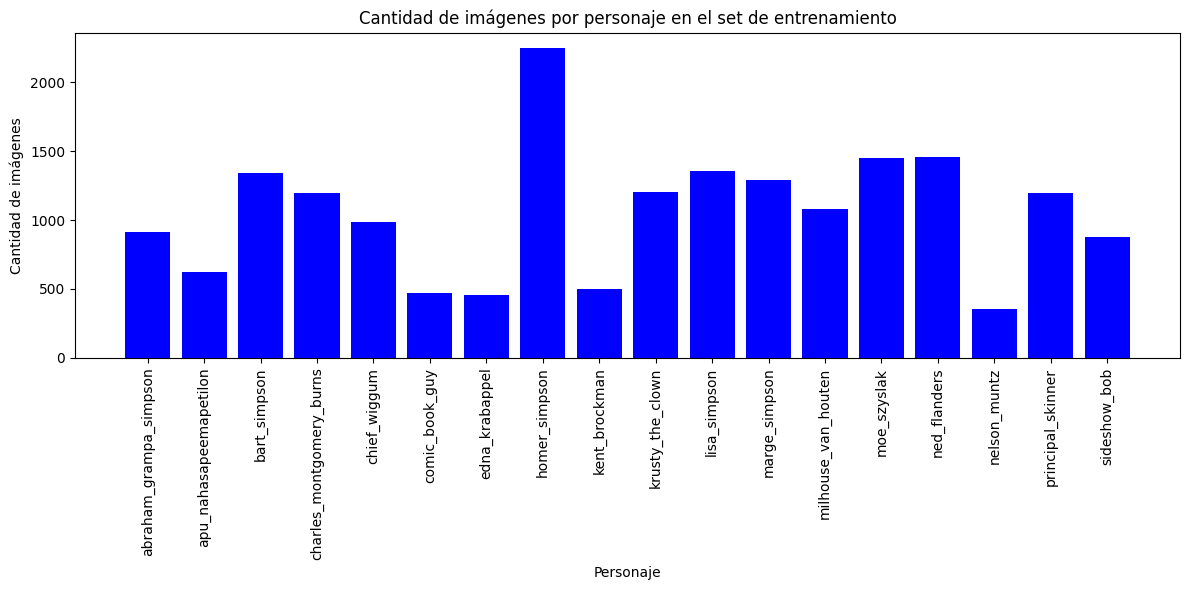

In [ ]:
cantidad_por_personaje = collections.Counter(y)
nombres = [MAP_CHARACTERS[a] for a in cantidad_por_personaje.keys()]
cantidad = list(cantidad_por_personaje.values())

plt.figure(figsize=(12, 6))
plt.bar(nombres, cantidad, color='blue')
plt.xticks(rotation=90)
plt.title("Cantidad de imágenes por personaje en el set de entrenamiento")
plt.xlabel("Personaje")
plt.ylabel("Cantidad de imágenes")
plt.tight_layout()
plt.show()

Existen problemas en la distribución de las imágenes, ya que algunas clases, como la de homer_simpson, cuentan con más de 2,000 ejemplares, mientras que otras, como nelson_muntz, tienen menos de 500 imágenes. Esto podría generar dificultades en el entrenamiento, ya que las clases con pocos ejemplos podrían no ser identificadas correctamente por el modelo, lo que podría llevar a resultados inexactos.

Otras imagenes puede ser personajes que fisicamente se puedan parecer como (NOSEEEEEEEEEE WN NO SE ME OCURRE NINGUNO), tambien si en las imagenes aparece 2 personajes.

Para mejorar esta distribución, se utilizará la técnica de data augmentation. Esta técnica genera variantes de una imagen original mediante transformaciones como rotaciones, volteos, escalado y otras modificaciones. El uso de data augmentation permite crear más ejemplos de las clases con menos imágenes, lo que ayuda a entrenar modelos más robustos y a evitar problemas de sobreentrenamiento, asegurando una mejor generalización del modelo.


Se define la copia de los datos para proceder a trabajar con ellos sin data augmentation

In [ ]:
# Copia de los datos originales
X_original = X.copy()
y_original = y.copy()

A continuación, se implementa la técnica de data augmentation para generar imágenes adicionales en las clases con pocos ejemplos. A través de transformaciones como rotaciones, desplazamientos y escalados, se amplía la diversidad del conjunto de entrenamiento. Esto permite equilibrar la cantidad de datos entre las clases, lo que favorece una mejor capacidad de generalización del modelo y optimiza su desempeño en las clases menos representadas. Al finalizar, las imágenes aumentadas se combinan con las originales para obtener un conjunto de datos balanceado.

In [ ]:
# Crear el generador de aumento
datagen = ImageDataGenerator(
    rotation_range=15,         # Rango moderado, más seguro para rostros y figuras
    width_shift_range=0.1,     # Pequeños desplazamientos horizontales
    height_shift_range=0.1,    # Pequeños desplazamientos verticales
    shear_range=0.05,          # Inclinaciones leves para no distorsionar caras
    zoom_range=0.1,            # Zoom leve para variar escala
    horizontal_flip=True,      # Muy útil si el personaje se ve igual al voltearse
    fill_mode='nearest'        # Mantiene continuidad visual al rellenar bordes
)

# Contar imágenes por clase
class_counts = Counter(y)
max_count = max(class_counts.values())
print("Distribución original:", class_counts)

X_augmented = []
y_augmented = []

for class_label, count in class_counts.items():
    if count < max_count:
        n_to_generate = max_count - count
        print(f"Aumentando clase {class_label} ({MAP_CHARACTERS[class_label]}): generando {n_to_generate} imágenes...")

        # Obtener solo las imágenes de esta clase
        class_indices = np.where(y == class_label)[0]
        class_images = X[class_indices]

        # Elegir imágenes aleatorias para aumentar
        for _ in range(n_to_generate):
            img = random.choice(class_images)
            img = np.expand_dims(img, axis=0)
            augmented_img = next(datagen.flow(img, batch_size=1))[0].astype('uint8')
            X_augmented.append(augmented_img)
            y_augmented.append(class_label)

# Combinar datos originales + aumentados
X = np.concatenate([X, np.array(X_augmented)], axis=0)
y = np.concatenate([y, np.array(y_augmented)], axis=0)

# Verificar nueva distribución
print("Nueva distribución balanceada:", Counter(y))

Distribución original: Counter({7: 2246, 14: 1454, 13: 1452, 10: 1354, 2: 1342, 11: 1291, 9: 1206, 16: 1194, 3: 1193, 12: 1079, 4: 986, 0: 913, 17: 877, 1: 623, 8: 498, 5: 469, 6: 457, 15: 358})
Aumentando clase 0 (abraham_grampa_simpson): generando 1333 imágenes...
Aumentando clase 1 (apu_nahasapeemapetilon): generando 1623 imágenes...
Aumentando clase 2 (bart_simpson): generando 904 imágenes...
Aumentando clase 3 (charles_montgomery_burns): generando 1053 imágenes...
Aumentando clase 4 (chief_wiggum): generando 1260 imágenes...
Aumentando clase 5 (comic_book_guy): generando 1777 imágenes...
Aumentando clase 6 (edna_krabappel): generando 1789 imágenes...
Aumentando clase 8 (kent_brockman): generando 1748 imágenes...
Aumentando clase 9 (krusty_the_clown): generando 1040 imágenes...
Aumentando clase 10 (lisa_simpson): generando 892 imágenes...
Aumentando clase 11 (marge_simpson): generando 955 imágenes...
Aumentando clase 12 (milhouse_van_houten): generando 1167 imágenes...
Aumentando c

Al aplicar la técnica de data augmentation, se busca equilibrar la cantidad de imágenes en cada clase. En este caso, la clase con más imágenes después de la augmentación es la clase 7, correspondiente a homer_simpson, que cuenta con un total de 2246 imágenes. Las demás clases generaron nuevas imágenes hasta alcanzar esta cantidad, asegurando que todas las clases tengan 2246 imágenes.

Como resultado, el número total de imágenes de entrenamiento es ahora de 40,428.

Ahora, para evitar sesgos en los datos y garantizar una distribución aleatoria tanto en el conjunto de entrenamiento como en el conjunto de validación, se barajan aleatoriamente las imágenes. Si no se realiza este paso, al separar el 20% de los datos para validación, podría ser que se estén utilizando solo un pequeño número de personajes.

El primer código baraja los datos sin data augmentation, mientras que el segundo bloque baraja los datos con data augmentation. En ambos casos, se asegura que el conjunto de datos esté completamente desordenado para mejorar la generalización del modelo durante el entrenamiento

In [ ]:
# Se va a barajar aleatoriamente los datos. Esto es importante ya que si no
# se realiza y, por ejemplo, se escogen el 20% de los datos finales como validation
# set, se estará utilizando solo un pequeño número de personajes, ya que
# las imágenes se leen secuencialmente personaje a personaje.

#datos sin data augmentation
perm_orig = np.random.permutation(len(X_original))
X_noaug = X_original[perm_orig]
y_noaug = y_original[perm_orig]

In [ ]:
#Datos con data augmentation
perm = np.random.permutation(len(X))
X, y = X[perm], y[perm]

In [ ]:
import gc
del X_original
del y_original
del X_augmented
del y_augmented
gc.collect()

4752

*AGREAGR EL PQ DE ESTO

Una vez que hemos aplicado la técnica de data augmentation y realizado la aleatoridad de los datos, el siguiente paso es separar el conjunto de datos de entrenamiento en dos subconjuntos: uno para entrenamiento y otro para validación. Utilizando la función train_test_split, se divide un 80% de los datos para entrenamiento y un 20% para validación tanto para los datos sin data augmentation como para los datos con data augmentation.

En este código, también se calcula y muestra el número total de imágenes de entrenamiento, validación y prueba, así como las dimensiones de cada conjunto y el número de canales de color para las imágenes. Se verifica que los tamaños de los conjuntos sean correctos y se asegura que la resolución de las imágenes coincida con las especificaciones previas.

Esto se realiza para garantizar que los datos estén organizados correctamente antes de entrenar y evaluar el modelo.

In [ ]:
# Separa el conjunto de datos de entrenamiento en entrenamiento y validación con 20% con datos sin data augmentation
X_train_noaug, X_val_noaug, y_train_noaug, y_val_noaug = train_test_split(X_noaug, y_noaug, test_size=0.2, random_state=29)

# Variables con nÚmero de elementos
X_train_num_elem = X_train_noaug.shape[0]
X_val_num_elem = X_val_noaug.shape[0]
X_test_num_elem = X_test.shape[0]

# Dimensiones
img_rows = IMG_SIZE
img_cols = IMG_SIZE
img_channels = X.shape[3]

# Número de categorías
num_categ = len(MAP_CHARACTERS)

# Comprueba que efectivamente los resultados son los esperados
print("Número de imágenes de anterior training : ", X_noaug.shape[0])
print("Número de imágenes de training (80% de anterior train) : ", X_train_num_elem)
print("Número de imágenes de validación (20% de anterior train) : ", X_val_num_elem)
print("Número de imágenes de test : ", X_test_num_elem)
print("="*15)
print("Número de resultados de anterior training : ", y_noaug.shape[0])
print("Número de resultados de training (80% de anterior train) : ", y_train_noaug.shape[0])
print("Número de resultadoss de validación (20% de anterior train) : ", y_val_noaug.shape[0])
print("Número de resultados de test : ", y_test.shape[0])
print("="*15)
print("Dimensiones de training : ", X_train_noaug.shape)
print("Dimensiones de validation : ", X_val_noaug.shape)
print("Dimensiones de tests : ", X_test.shape)
print("="*15)
print("Canales de color para las imagenes : ", img_channels)
print("Resolución imágenes de anterior training : ", X.shape[1], "x", X.shape[2])
print("Resolución imágenes de training (80% de anterior train) : ", X_train_noaug.shape[1], "X", X_train_noaug.shape[2])
print("Resolución imágenes de validación (20% de anterior train) : ", X_val_noaug.shape[1], "x", X_val_noaug.shape[2])
print("Resolución imágenes de test : ", X_test.shape[1], "x", X_test.shape[2])

Número de imágenes de anterior training :  18992
Número de imágenes de training (80% de anterior train) :  15193
Número de imágenes de validación (20% de anterior train) :  3799
Número de imágenes de test :  890
Número de resultados de anterior training :  18992
Número de resultados de training (80% de anterior train) :  15193
Número de resultadoss de validación (20% de anterior train) :  3799
Número de resultados de test :  890
Dimensiones de training :  (15193, 64, 64, 3)
Dimensiones de validation :  (3799, 64, 64, 3)
Dimensiones de tests :  (890, 64, 64, 3)
Canales de color para las imagenes :  3
Resolución imágenes de anterior training :  64 x 64
Resolución imágenes de training (80% de anterior train) :  64 X 64
Resolución imágenes de validación (20% de anterior train) :  64 x 64
Resolución imágenes de test :  64 x 64


In [ ]:
# Separa el conjunto de datos de entrenamiento en entrenamiento y validación con 20% con data augumentation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=29)

# Variables con nÚmero de elementos
X_train_num_elem = X_train.shape[0]
X_val_num_elem = X_val.shape[0]
X_test_num_elem = X_test.shape[0]

# Dimensiones
img_rows = IMG_SIZE
img_cols = IMG_SIZE
img_channels = X.shape[3]

# Número de categorías
num_categ = len(MAP_CHARACTERS)

# Comprueba que efectivamente los resultados son los esperados
print("Número de imágenes de anterior training : ", X.shape[0])
print("Número de imágenes de training (80% de anterior train) : ", X_train_num_elem)
print("Número de imágenes de validación (20% de anterior train) : ", X_val_num_elem)
print("Número de imágenes de test : ", X_test_num_elem)
print("="*15)
print("Número de resultados de anterior training : ", y.shape[0])
print("Número de resultados de training (80% de anterior train) : ", y_train.shape[0])
print("Número de resultadoss de validación (20% de anterior train) : ", y_val.shape[0])
print("Número de resultados de test : ", y_test.shape[0])
print("="*15)
print("Dimensiones de training : ", X_train.shape)
print("Dimensiones de validation : ", X_val.shape)
print("Dimensiones de tests : ", X_test.shape)
print("="*15)
print("Canales de color para las imagenes : ", img_channels)
print("Resolución imágenes de anterior training : ", X.shape[1], "x", X.shape[2])
print("Resolución imágenes de training (80% de anterior train) : ", X_train.shape[1], "X", X_train.shape[2])
print("Resolución imágenes de validación (20% de anterior train) : ", X_val.shape[1], "x", X_val.shape[2])
print("Resolución imágenes de test : ", X_test.shape[1], "x", X_test.shape[2])

Número de imágenes de anterior training :  40428
Número de imágenes de training (80% de anterior train) :  32342
Número de imágenes de validación (20% de anterior train) :  8086
Número de imágenes de test :  890
Número de resultados de anterior training :  40428
Número de resultados de training (80% de anterior train) :  32342
Número de resultadoss de validación (20% de anterior train) :  8086
Número de resultados de test :  890
Dimensiones de training :  (32342, 64, 64, 3)
Dimensiones de validation :  (8086, 64, 64, 3)
Dimensiones de tests :  (890, 64, 64, 3)
Canales de color para las imagenes :  3
Resolución imágenes de anterior training :  64 x 64
Resolución imágenes de training (80% de anterior train) :  64 X 64
Resolución imágenes de validación (20% de anterior train) :  64 x 64
Resolución imágenes de test :  64 x 64


A contunuación se realiza la normalización de las imágenes tanto para los datos con data augmentation como para los datos sin data augmentation. La normalización se realiza dividiendo los valores de las imágenes entre 255 para que todos los valores estén en el rango [0, 1], lo que ayuda a mejorar el entrenamiento del modelo al hacer que el aprendizaje sea más eficiente.

Además, se aplica la técnica de one-hot encoding a las etiquetas, tanto para los datos con data augmentation como para los datos sin ella. El one-hot encoding transforma las etiquetas de clase en vectores binarios, donde solo la posición correspondiente a la clase es 1, y las demás posiciones son 0. Esto es necesario porque muchos modelos de redes neuronales requieren que las etiquetas estén en este formato para tareas de clasificación multiclase.

Finalmente, se imprime la forma de los conjuntos de entrenamiento, validación y prueba tanto para las imágenes como para las etiquetas para asegurarse de que las dimensiones son las correctas antes de proceder con el entrenamiento del modelo.

In [ ]:
#normalizar sin data augmentation
X_train_noaug = X_train_noaug / 255
X_val_noaug = X_val_noaug / 255
X_test_norm = X_test / 255
print(X_train_noaug.shape, X_val_noaug.shape, X_test_norm.shape)


#aplicar el one-hot sin data augmentation
y_train_noaug = keras.utils.to_categorical(y_train_noaug, 18)
y_val_noaug = keras.utils.to_categorical(y_val_noaug, 18)
y_test_oh = keras.utils.to_categorical(y_test, 18)

print(y_train_noaug.shape, y_val_noaug.shape, y_test_oh.shape)

(15193, 64, 64, 3) (3799, 64, 64, 3) (890, 64, 64, 3)
(15193, 18) (3799, 18) (890, 18)


Tras aplicar la normalización y el one-hot encoding, se obtiene la siguiente estructura final de los datos sin data augmentation:


Datos de entrada (imágenes):

*   Entrenamiento: 15,193 imágenes
*   Validación: 3,799 imágenes
*   Test: 890 imágenes
*   Todas con resolución de 64x64 píxeles y 3 canales de color (RGB)

Etiquetas (one-hot):


*   Entrenamiento: vectores de dimensión 18 para cada imagen
*   Validación: vectores de dimensión 18
*   Test: vectores de dimensión 18





In [ ]:
#normalizar con data augmentation
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255
print(X_train.shape, X_val.shape, X_test.shape)

#aplicar el one-hot con data augmentation
y_train = keras.utils.to_categorical(y_train, 18)
y_val = keras.utils.to_categorical(y_val, 18)
y_test = keras.utils.to_categorical(y_test, 18)

print(y_train.shape, y_val.shape, y_test.shape)

(32342, 64, 64, 3) (8086, 64, 64, 3) (890, 64, 64, 3)
(32342, 18) (8086, 18) (890, 18)




Tras aplicar la normalización y el one-hot encoding, se obtiene la siguiente estructura final de los datos con data augmentation:

Datos de entrada (imágenes):

*   Entrenamiento: 32,342 imágenes
*   Validación: 8,086 imágenes
*   Test: 890 imágenes
*   Todas con resolución de 64x64 píxeles y 3 canales de color (RGB)


Etiquetas (one-hot):

*   Entrenamiento: vectores de dimensión 18 para cada imagen
*   Validación: vectores de dimensión 18
*   Test: vectores de dimensión 18

Estos resultados confirman que los datos están correctamente preparados y listos para entrenar los modelos con y sin aplicar data augmentation.

# Definición de modelos

En esta etapa se procederá a definir y entrenar distintos modelos de redes neuronales con el objetivo de clasificar imágenes de personajes de la serie Los Simpson. El enfoque adoptado contempla una evolución progresiva en la complejidad de los modelos, organizada en dos fases: modelos sin data augmentation y modelos con data augmentation.

1. Primera fase: Modelos sin data augmentation
El entrenamiento comenzará con los datos originales (sin aumento artificial). Se partirá con un modelo base conformado por:



*   1 capa convolucional (Conv2D) para extracción de características.
*   1 capa de pooling (MaxPooling2D) para reducción de dimensionalidad.
*   5 capas densas ocultas
*   Dropout aplicado en las capas ocultas para prevenir el sobreajuste.

Posteriormente, se irá aumentando progresivamente la complejidad del modelo al:

*   Agregar más capas convolucionales y de pooling.
*   Reducir gradualmente el número de capas densas, ya que la extracción de características recaerá en las capas convolucionales.
*   Incorporar Batch Normalization como última mejora, para estabilizar y acelerar el proceso de entrenamiento.

2. Segunda fase: Modelos con data augmentation
Una vez probadas las distintas configuraciones sin data augmentation, se repetirá el proceso utilizando data augmentation. Se aplicará la misma experimentación anterior:


*   Partiendo desde el modelo base con una sola capa convolucional y de pooling más 5 capas densas.
*   Aumentando progresivamente la cantidad de capas convolucionales y pooling.
*   Incorporando finalmente Batch Normalization con ajuste en la arquitectura (reducción de capas densas).

Cada modelo será evaluado mediante:


*   Métricas de desempeño en los conjuntos de validación y prueba: accuracy, recall y precision.
*   Curvas de aprendizaje que permitirán visualizar la evolución del accuracy y la loss por época.


Este enfoque facilitará comparar el impacto de cada modificación en el rendimiento, tanto con como sin data augmentation, y permitirá identificar la arquitectura óptima que ofrezca el mejor equilibrio entre capacidad de generalización y eficiencia.


## Configuración común para todos los modelos

Cada modelo se entrena utilizando una configuración de hiperparámetros común, seleccionados para equilibrar precisión, velocidad de convergencia y estabilidad durante el aprendizaje:

Optimizador: Adam
Se utiliza el optimizador Adam ya que es eficiente computacionalmente, requiere poca memoria y se adapta bien a problemas con grandes cantidades de datos y parámetros, como las redes neuronales convolucionales.

Función de activación (capas ocultas): Relu
La función de activación Relu se elige porque introduce no linealidad de forma eficiente y ayuda a evitar el problema del gradiente, permitiendo que las redes profundas aprendan patrones complejos.

Función de activación (capa de salida): Softmax
Se usa softmax en la capa de salida porque el problema es de clasificación multiclase. Esta función convierte los valores de salida en probabilidades que suman 1, lo que permite interpretar cada salida como la probabilidad de pertenencia a una clase.

Función de pérdida: categorical_crossentropy
Dado que las etiquetas están codificadas en one-hot y se trata de un problema de clasificación con más de dos clases, la función categorical_crossentropy es la más adecuada para calcular la pérdida entre las predicciones y las clases reales.

#MODELOS SIN DATA AUG

## Modelo 1

Este primer modelo aplica una arquitectura sencilla con una sola capa convolucional seguida de pooling para la extracción de características espaciales básicas. Luego, se conectan cinco capas ocultas densas con funciones de activación ReLU, intercaladas con capas Dropout, lo que permite introducir regularización y prevenir el sobreajuste.

El flujo del modelo es el siguiente:

*   Capa convolucional (Conv2D) con 32 filtros y activación Relu para capturar patrones locales en las imágenes.
*   Capa Flatten, que convierte los mapas de características en un vector unidimensional.
*   Cinco capas densas (Dense) con tamaños decrecientes (512 a 32), todas con activación Relu.
*   Capas Dropout con tasas de 0.3 a 0.35 distribuidas entre las capas ocultas, como estrategia de regularización.
*   Capa de salida (Dense) con 18 neuronas y activación softmax, que entrega la probabilidad de pertenencia a cada una de las 18 clases.


Esta arquitectura se utiliza como modelo base sin aplicar data augmentation para establecer una línea de comparación. Se comienza con esta estructura porque permite evaluar el desempeño de una red sin exceso de complejidad. A partir de este punto, es posible observar cómo rinde el modelo de forma pura, lo que permite medir con mayor precisión los beneficios que aporta la inclusión progresiva de más capas convolucionales, el uso de Batch normalization y finalmente el data augmentation, manteniendo una evolución estructurada y fundamentada en el diseño del modelo.

In [ ]:
red_sin_augmentation = keras.Sequential(name="Primera_red_sin_aug")
red_sin_augmentation.add(Input(shape=(64, 64, 3), name="entrada"))

red_sin_augmentation.add(Conv2D(32, (3, 3), activation='relu', padding='same', name="convolucion_1"))
red_sin_augmentation.add(MaxPooling2D((2, 2), name="pooling_1"))

red_sin_augmentation.add(Flatten(name="flatten_1"))

red_sin_augmentation.add(Dropout(0.3, name="dropout_1"))
red_sin_augmentation.add(Dense(512, activation='relu', name="CapaOculta_1"))
red_sin_augmentation.add(Dropout(0.3, name="dropout_2"))
red_sin_augmentation.add(Dense(256, activation='relu', name="CapaOculta_2"))
red_sin_augmentation.add(Dense(128, activation='relu', name="CapaOculta_3"))
red_sin_augmentation.add(Dropout(0.3, name="dropout_3"))
red_sin_augmentation.add(Dense(64, activation='relu', name="CapaOculta_4"))
red_sin_augmentation.add(Dropout(0.3, name="dropout_4"))
red_sin_augmentation.add(Dense(32, activation='relu', name="CapaOculta_5"))
red_sin_augmentation.add(Dropout(0.35, name="dropout_5"))
red_sin_augmentation.add(Dense(18, activation='softmax', name="salida"))
red_sin_augmentation.summary()

Model: "Primera_red_sin_aug"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ convolucion_1 (Conv2D)               │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling_1 (MaxPooling2D)             │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ CapaOculta_1 (Dense)                 │ (None, 512)                 │      16,777,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ CapaOculta_2 (Dense)                 │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ CapaOculta_3 (Dense)                 │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ CapaOculta_4 (Dense)                 │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ CapaOculta_5 (Dense)                 │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ salida (Dense)                       │ (None, 18)                  │             594 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,953,778 (64.67 MB)

 Trainable params: 16,953,778 (64.67 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
red_sin_augmentation.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'precision', 'recall']
)

hist_sin_aug = red_sin_augmentation.fit(
    X_train_noaug, y_train_noaug,
    validation_data=(X_val_noaug, y_val_noaug),
    batch_size=32,
    epochs=10
)

Epoch 1/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - accuracy: 0.0964 - loss: 2.9024 - precision: 0.1886 - recall: 0.0017 - val_accuracy: 0.2295 - val_loss: 2.4602 - val_precision: 0.9200 - val_recall: 0.0242
Epoch 2/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.2207 - loss: 2.4620 - precision: 0.6702 - recall: 0.0433 - val_accuracy: 0.3656 - val_loss: 2.0028 - val_precision: 0.8804 - val_recall: 0.1395
Epoch 3/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.3732 - loss: 2.0148 - precision: 0.7428 - recall: 0.1560 - val_accuracy: 0.4691 - val_loss: 1.7354 - val_precision: 0.8150 - val_recall: 0.2285
Epoch 4/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4899 - loss: 1.6231 - precision: 0.7868 - recall: 0.2838 - val_accuracy: 0.5478 - val_loss: 1.5218 - val_precision: 0.7846 - val_recall: 0.3683
Epoch 5/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.5742 - loss: 1.3305 - precision: 0.8151 - recall: 0.3978 - val_accuracy: 0.5833 - val_l

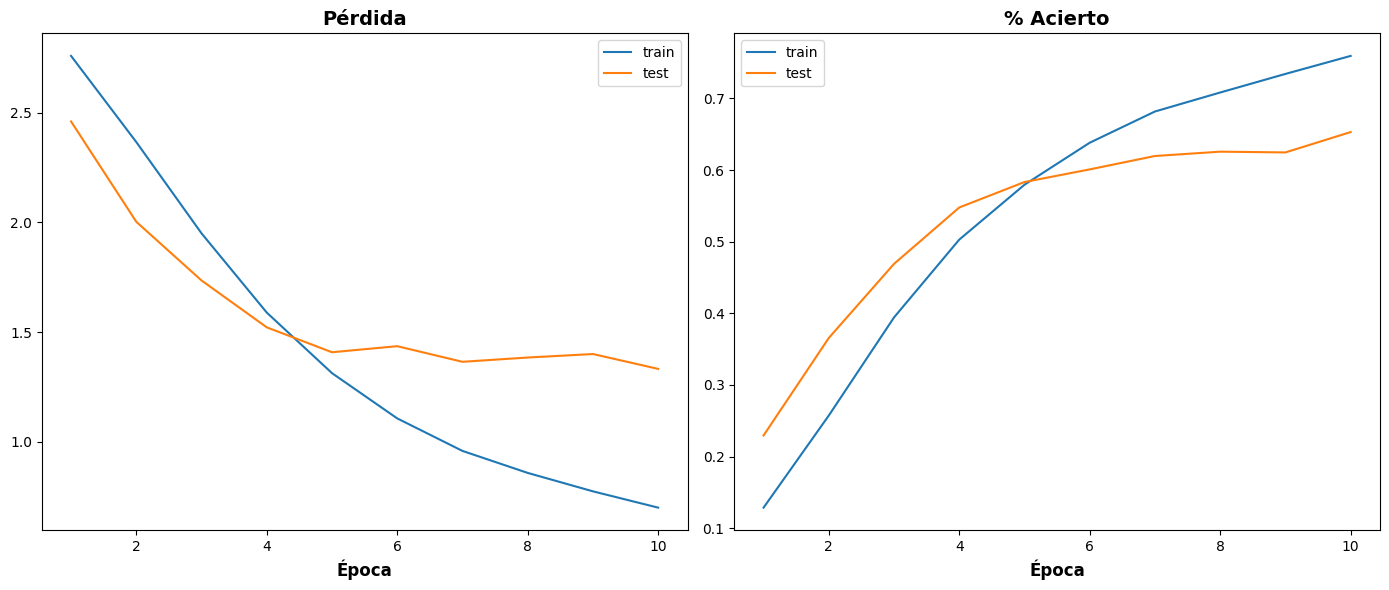

In [ ]:
graficar_historial_entrenamiento(hist_sin_aug)

El modelo muestra una mejora sostenida en su desempeño durante el entrenamiento, evidenciada por un aumento progresivo en la precisión y una reducción continua en la pérdida. A lo largo de las épocas, también se observa una mejora en la precisión sobre el conjunto de validación, aunque de forma más moderada que en el entrenamiento. La pérdida de validación, si bien tiende a disminuir inicialmente, comienza a estabilizarse en las últimas épocas, con ligeras fluctuaciones. Este comportamiento sugiere que el modelo está aprendiendo correctamente, pero empieza a presentar señales de sobreajuste, donde su capacidad de generalización no mejora al mismo ritmo que su rendimiento sobre los datos de entrenamiento.

In [ ]:
df_metricas_red_sin_augmentation = crear_df_metricas(hist_sin_aug, "Primera_red_sin_aug")

,Métrica,Primera_red_sin_aug
0,accuracy,0.759363
1,loss,0.699849
2,precision,0.863130
3,recall,0.668268
4,val_accuracy,0.653067
5,val_loss,1.332384
6,val_precision,0.812407
7,val_recall,0.575678


El modelo muestra un desempeño más alto durante el entrenamiento que en la validación. Esto se observa en que las métricas como precision, recall y accuracy son más bajas cuando se prueba con datos nuevos. Esto indica que el modelo se ajusta bien a los datos que vio durante el entrenamiento, pero tiene dificultades para generalizar a otros casos. Una posible razón es que no se aplicó data augmentation, lo cual podría haber limitado la diversidad de ejemplos vistos durante el aprendizaje y reducido su capacidad para adaptarse a nuevas situaciones.

##Modelo 2

En esta segunda versión del modelo sin data augmentation, se incorpora una capa convolucional adicional para mejorar la capacidad del modelo de captar patrones visuales más complejos en las imágenes. La estructura de las capas densas y las técnicas de regularización, como el dropout, se mantienen igual que en el modelo anterior, al igual que los hiperparámetros principales, como el tamaño de los filtros, funciones de activación y las tasas de dropout. Esta configuración permite evaluar cómo el aumento en la profundidad de la parte convolucional impacta el desempeño del modelo, facilitando una comparación directa entre las redes.

In [ ]:
red_sin_augmentation_2 = keras.Sequential(name="Segunda_red_sin_aug")
red_sin_augmentation_2.add(Input(shape=(64, 64, 3), name="entrada"))

red_sin_augmentation_2.add(Conv2D(32, (3, 3), activation='relu', padding='same', name="convolucion_1"))
red_sin_augmentation_2.add(MaxPooling2D((2, 2), name="pooling_1"))

red_sin_augmentation_2.add(Conv2D(64, (3, 3), activation='relu', padding='same', name="convolucion_2"))
red_sin_augmentation_2.add(MaxPooling2D((2, 2), name="pooling_2"))

red_sin_augmentation_2.add(Flatten(name="flatten_1"))

red_sin_augmentation_2.add(Dropout(0.3, name="dropout_1"))
red_sin_augmentation_2.add(Dense(512, activation='relu', name="CapaOculta_1"))

red_sin_augmentation_2.add(Dropout(0.3, name="dropout_2"))
red_sin_augmentation_2.add(Dense(256, activation='relu', name="CapaOculta_2"))

red_sin_augmentation_2.add(Dense(128, activation='relu', name="CapaOculta_3"))

red_sin_augmentation_2.add(Dropout(0.3, name="dropout_3"))
red_sin_augmentation_2.add(Dense(64, activation='relu', name="CapaOculta_4"))

red_sin_augmentation_2.add(Dropout(0.3, name="dropout_4"))
red_sin_augmentation_2.add(Dense(32, activation='relu', name="CapaOculta_5"))

red_sin_augmentation_2.add(Dropout(0.35, name="dropout_5"))

red_sin_augmentation_2.add(Dense(18, activation='softmax', name="salida"))

red_sin_augmentation_2.summary()

Model: "Segunda_red_sin_aug"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ convolucion_1 (Conv2D)               │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling_1 (MaxPooling2D)             │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ convolucion_2 (Conv2D)               │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling_2 (MaxPooling2D)             │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ CapaOculta_1 (Dense)                 │ (None, 512)                 │       8,389,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ CapaOculta_2 (Dense)                 │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ CapaOculta_3 (Dense)                 │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ CapaOculta_4 (Dense)                 │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ CapaOculta_5 (Dense)                 │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ salida (Dense)                       │ (None, 18)                  │             594 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,583,666 (32.74 MB)

 Trainable params: 8,583,666 (32.74 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
np.random.seed(29)
tf.random.set_seed(29)

red_sin_augmentation_2.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'precision', 'recall']
)

hist_sin_aug_2 = red_sin_augmentation_2.fit(
    X_train_noaug, y_train_noaug,
    batch_size=32,
    epochs=10,
    validation_data=(X_val_noaug, y_val_noaug)
)

Epoch 1/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.1213 - loss: 2.7881 - precision: 0.5561 - recall: 0.0091 - val_accuracy: 0.2767 - val_loss: 2.2627 - val_precision: 0.8231 - val_recall: 0.0563
Epoch 2/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.2900 - loss: 2.2540 - precision: 0.7272 - recall: 0.0880 - val_accuracy: 0.4330 - val_loss: 1.7532 - val_precision: 0.8999 - val_recall: 0.1940
Epoch 3/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4265 - loss: 1.7985 - precision: 0.7972 - recall: 0.2301 - val_accuracy: 0.5438 - val_loss: 1.4371 - val_precision: 0.8608 - val_recall: 0.3319
Epoch 4/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5283 - loss: 1.4808 - precision: 0.8047 - recall: 0.3343 - val_accuracy: 0.5959 - val_loss: 1.3117 - val_precision: 0.8051 - val_recall: 0.4512
Epoch 5/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5905 - loss: 1.2595 - precision: 0.8108 - recall: 0.4184 - val_accuracy: 0.6417 - val_loss

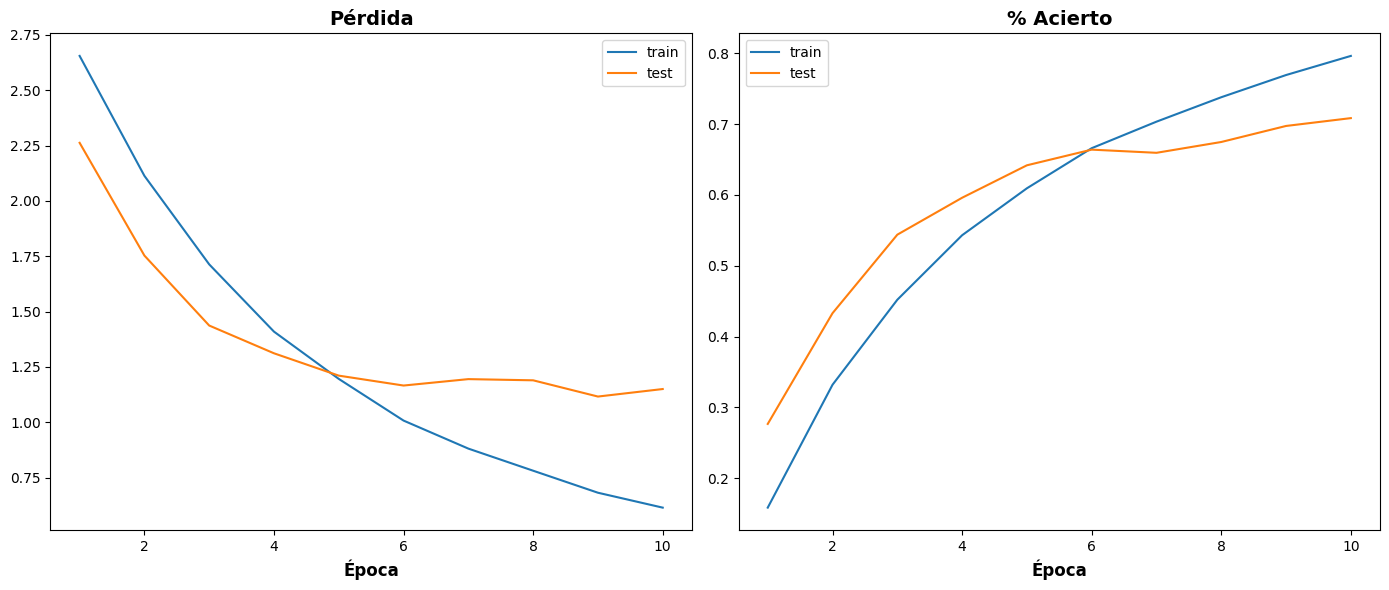

In [ ]:
graficar_historial_entrenamiento(hist_sin_aug_2)

El segundo modelo muestra una mejora durante el entrenamiento, pero presenta signos evidentes de sobreajuste, ya que el accuracy en validación no mejora de manera significativa y la pérdida de validación incluso aumenta hacia el final. Esto indica que, aunque el modelo aprende bien los datos de entrenamiento, no logra generalizar igual de bien a datos nuevos.

En comparación, el primer modelo presenta un desempeño inferior, con menor accuracy y mayores pérdidas, lo que confirma que el segundo modelo es una mejora, aunque aún requiere ajustes para evitar el sobreajuste y mejorar su generalización.

In [ ]:
df_metricas_red_sin_augmentation_2 = crear_df_metricas(hist_sin_aug_2, "Segunda_red_sin_aug")

,Métrica,Segunda_red_sin_aug
0,accuracy,0.796156
1,loss,0.614321
2,precision,0.877692
3,recall,0.718884
4,val_accuracy,0.708344
5,val_loss,1.150193
6,val_precision,0.818957
7,val_recall,0.657278


En cuanto a las métricas generales, el segundo modelo muestra un mejor desempeño durante el entrenamiento en comparación con el primero, evidenciado por métricas más altas de precisión, recall y accuracy, junto con una pérdida menor. Sin embargo, aunque también tiene mejores resultados en validación, la diferencia entre entrenamiento y validación sigue siendo notable, lo que sugiere que el modelo todavía presenta un sobreajuste.
Esta mejora en el desempeño se puede atribuir en parte a la arquitectura más profunda del segundo modelo, que incluye una segunda capa convolucional adicional, lo que permite capturar características más complejas y representativas de las imágenes. Sin embargo, a pesar de esta arquitectura mejorada, el modelo aún presenta limitaciones para generalizar completamente, mostrando que habría espacio para optimizar aún más, por ejemplo, mediante más ajustes de su arquitectura. En comparación con el primer modelo, el segundo es superior en rendimiento, pero ninguna de las dos redes logra una generalización completamente estable.










##Modelo 3

Continuando con la optimización de la arquitectura, esta tercera red incrementa la profundidad del modelo al incorporar una tercera capa convolucional seguida de su respectivo pooling. Además, se ajustaron las tasas de dropout para intentar mejorar la regularización y prevenir el sobreajuste, especialmente en las capas densas finales. A diferencia del modelo anterior, también se modificó la estructura de las capas densas, reduciendo progresivamente su tamaño y cantidad, lo que busca simplificar la parte final del modelo para disminuir la complejidad y mitigar el sobreajuste. Esta configuración busca extraer representaciones más complejas y detalladas de las imágenes, manteniendo un equilibrio entre capacidad y generalización. Los hiperparámetros principales, como la función de activación, el tamaño de los kernels y el optimizador, se mantienen consistentes con los modelos anteriores para facilitar una comparación directa de los efectos de la arquitectura sobre el rendimiento.

In [ ]:
red_sin_augmentation_3 = keras.Sequential(name="Tercera_red_sin_aug")
red_sin_augmentation_3.add(Input(shape=(64, 64, 3), name="entrada"))

red_sin_augmentation_3.add(Conv2D(32, (3, 3), activation='relu', padding='same', name="convolucion_1"))
red_sin_augmentation_3.add(MaxPooling2D((2, 2), name="pooling_1"))

red_sin_augmentation_3.add(Conv2D(64, (3, 3), activation='relu', padding='same', name="convolucion_2"))
red_sin_augmentation_3.add(MaxPooling2D((2, 2), name="pooling_2"))

red_sin_augmentation_3.add(Conv2D(128, (3, 3), activation='relu', padding='same', name="convolucion_3"))
red_sin_augmentation_3.add(MaxPooling2D((2, 2), name="pooling_3"))

red_sin_augmentation_3.add(Flatten(name="flatten_1"))

red_sin_augmentation_3.add(Dropout(0.4, name="dropout_1"))
red_sin_augmentation_3.add(Dense(256, activation='relu', name="CapaOculta_1"))
red_sin_augmentation_3.add(Dropout(0.4, name="dropout_2"))
red_sin_augmentation_3.add(Dense(128, activation='relu', name="CapaOculta_2"))
red_sin_augmentation_3.add(Dropout(0.3, name="dropout_3"))
red_sin_augmentation_3.add(Dense(18, activation='softmax', name="salida"))

red_sin_augmentation_3.summary()

Model: "Tercera_red_sin_aug"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ convolucion_1 (Conv2D)               │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling_1 (MaxPooling2D)             │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ convolucion_2 (Conv2D)               │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling_2 (MaxPooling2D)             │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ convolucion_3 (Conv2D)               │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling_3 (MaxPooling2D)             │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ CapaOculta_1 (Dense)                 │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ CapaOculta_2 (Dense)                 │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ salida (Dense)                       │ (None, 18)                  │           2,322 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,225,874 (8.49 MB)

 Trainable params: 2,225,874 (8.49 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
np.random.seed(29)
tf.random.set_seed(29)

red_sin_augmentation_3.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'precision', 'recall']
)

hist_sin_aug_3 = red_sin_augmentation_3.fit(
    X_train_noaug, y_train_noaug,
    batch_size=32,
    epochs=10,
    validation_data=(X_val_noaug, y_val_noaug)
)

Epoch 1/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.1885 - loss: 2.5851 - precision: 0.5309 - recall: 0.0316 - val_accuracy: 0.5275 - val_loss: 1.5519 - val_precision: 0.8082 - val_recall: 0.2851
Epoch 2/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5150 - loss: 1.5769 - precision: 0.7628 - recall: 0.3180 - val_accuracy: 0.6833 - val_loss: 1.0193 - val_precision: 0.8687 - val_recall: 0.5591
Epoch 3/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6584 - loss: 1.1117 - precision: 0.8235 - recall: 0.5222 - val_accuracy: 0.7549 - val_loss: 0.8187 - val_precision: 0.8896 - val_recall: 0.6446
Epoch 4/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7393 - loss: 0.8499 - precision: 0.8565 - recall: 0.6402 - val_accuracy: 0.7939 - val_loss: 0.6881 - val_precision: 0.9021 - val_recall: 0.7231
Epoch 5/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7919 - loss: 0.6829 - precision: 0.8829 - recall: 0.7174 - val_accuracy: 0.8002 - val_loss

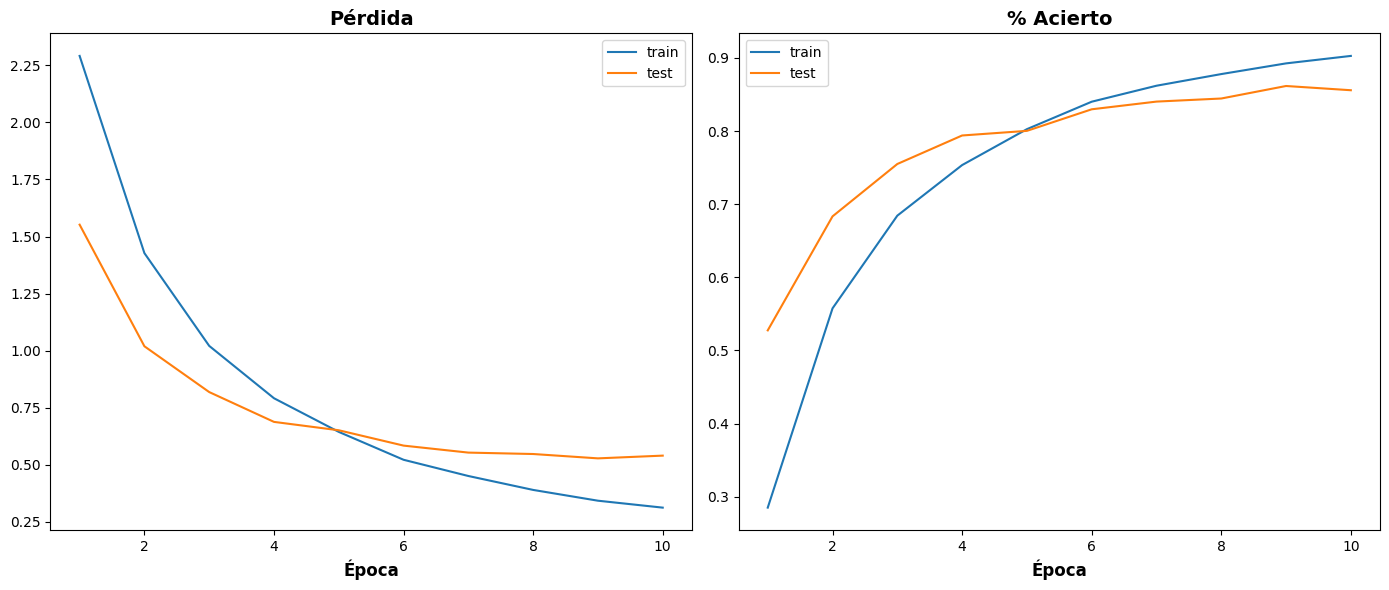

In [ ]:
graficar_historial_entrenamiento(hist_sin_aug_3)

En los gráficos de pérdida y aciertos del tercer modelo se observa un comportamiento más equilibrado y estable que en el segundo modelo. El acierto y la pérdida tanto en entrenamiento como en validación evolucionan más paralela y progresiva, lo que indica un mejor ajuste y una capacidad mayor para generalizar. Sin embargo, aunque la brecha entre entrenamiento y validación es  menor que en el modelo anterior, todavía se aprecian signos de sobreajuste, ya que el desempeño en entrenamiento es ligeramente mejor que en validación.

In [ ]:
df_metricas_red_sin_augmentation_3 = crear_df_metricas(hist_sin_aug_3, "Tercera_red_sin_aug")

,Métrica,Tercera_red_sin_aug
0,accuracy,0.902653
1,loss,0.312526
2,precision,0.935820
3,recall,0.875271
4,val_accuracy,0.855752
5,val_loss,0.540325
6,val_precision,0.906558
7,val_recall,0.822322


En cuanto a las métricas generales, el tercer modelo muestra un desempeño superior tanto en entrenamiento como en validación respecto al segundo modelo, incluso sin realizar data augmentation. Se observa un aumento significativo en accuracy, precisión y recall, junto con una notable reducción en la pérdida (loss) para ambas fases. Esta mejora puede atribuirse a la incorporación de una tercera capa convolucional adicional y el incremento del dropout para controlar el sobreajuste y una regularización más afectiva. A pesar de la clara mejora, se mantienen signos leves de sobreajuste, aunque mucho menos marcados que en modelos anteriores, evidenciando un balance más óptimo entre ajuste y generalización.

##Modelo 4

En esta cuarta versión del modelo sin data augmentation, se mantiene la misma cantidad de capas convolucionales y densas que en el modelo anterior, pero se incorporan capas de batch bormalization después de cada convolución y en las capas densas. Esta técnica busca estabilizar y acelerar el proceso de entrenamiento, al mismo tiempo que mejora la capacidad de generalización del modelo. Las tasas de dropout permanecen constantes con respecto al modelo anterior, permitiendo observar con mayor claridad el impacto del batch normalization. Los principales hiperparámetros, como el tamaño de los kernels, las funciones de activación y el optimizador, también se mantienen sin cambios.

In [ ]:
red_sin_augmentation_4 = keras.Sequential(name="Cuarta_red_sin_aug")
red_sin_augmentation_4.add(Input(shape=(64, 64, 3), name="entrada"))

red_sin_augmentation_4.add(Conv2D(32, (3, 3), activation='relu', padding='same', name="convolucion_1"))
red_sin_augmentation_4.add(BatchNormalization(name="batchNormalization_1"))
red_sin_augmentation_4.add(MaxPooling2D((2, 2), name="pooling_1"))

red_sin_augmentation_4.add(Conv2D(64, (3, 3), activation='relu', padding='same', name="convolucion_2"))
red_sin_augmentation_4.add(BatchNormalization(name="batchNormalization_2"))
red_sin_augmentation_4.add(MaxPooling2D((2, 2), name="pooling_2"))

red_sin_augmentation_4.add(Conv2D(128, (3, 3), activation='relu', padding='same', name="convolucion_3"))
red_sin_augmentation_4.add(BatchNormalization(name="batchNormalization_3"))
red_sin_augmentation_4.add(MaxPooling2D((2, 2), name="pooling_3"))

red_sin_augmentation_4.add(Flatten(name="Flatten"))

red_sin_augmentation_4.add(Dropout(0.4, name="dropout_1"))
red_sin_augmentation_4.add(Dense(256, activation='relu', name="CapaOculta_1"))
red_sin_augmentation_4.add(BatchNormalization(name="batchNormalization_4"))

red_sin_augmentation_4.add(Dropout(0.4, name="dropout_2"))
red_sin_augmentation_4.add(Dense(128, activation='relu', name="CapaOculta_2"))
red_sin_augmentation_4.add(BatchNormalization(name="batchNormalization_5"))

red_sin_augmentation_4.add(Dropout(0.3, name="dropout_3"))
red_sin_augmentation_4.add(Dense(18, activation='softmax', name="salida"))

red_sin_augmentation_4.summary()

Model: "Cuarta_red_sin_aug"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ convolucion_1 (Conv2D)               │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batchNormalization_1                 │ (None, 64, 64, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling_1 (MaxPooling2D)             │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ convolucion_2 (Conv2D)               │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batchNormalization_2                 │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling_2 (MaxPooling2D)             │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ convolucion_3 (Conv2D)               │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batchNormalization_3                 │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling_3 (MaxPooling2D)             │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ CapaOculta_1 (Dense)                 │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batchNormalization_4                 │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ CapaOculta_2 (Dense)                 │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batchNormalization_5                 │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ salida (Dense)                       │ (None, 18)                  │           2,322 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,228,306 (8.50 MB)

 Trainable params: 2,227,090 (8.50 MB)

 Non-trainable params: 1,216 (4.75 KB)

In [ ]:
np.random.seed(29)
tf.random.set_seed(29)

red_sin_augmentation_4.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'precision', 'recall']
)

hist_sin_aug_4 = red_sin_augmentation_4.fit(
    X_train_noaug, y_train_noaug,
    batch_size=32,
    epochs=10,
    validation_data=(X_val_noaug, y_val_noaug)
)

Epoch 1/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.2783 - loss: 2.5895 - precision: 0.4592 - recall: 0.1364 - val_accuracy: 0.4743 - val_loss: 1.6680 - val_precision: 0.7018 - val_recall: 0.2843
Epoch 2/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5713 - loss: 1.4406 - precision: 0.7713 - recall: 0.4247 - val_accuracy: 0.6786 - val_loss: 1.0347 - val_precision: 0.8317 - val_recall: 0.5657
Epoch 3/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6957 - loss: 1.0083 - precision: 0.8411 - recall: 0.5864 - val_accuracy: 0.7584 - val_loss: 0.7781 - val_precision: 0.8648 - val_recall: 0.6833
Epoch 4/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7731 - loss: 0.7488 - precision: 0.8718 - recall: 0.6942 - val_accuracy: 0.7036 - val_loss: 0.9819 - val_precision: 0.8272 - val_recall: 0.6162
Epoch 5/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8289 - loss: 0.5607 - precision: 0.8983 - recall: 0.7710 - val_accuracy: 0.7981 - val_loss: 

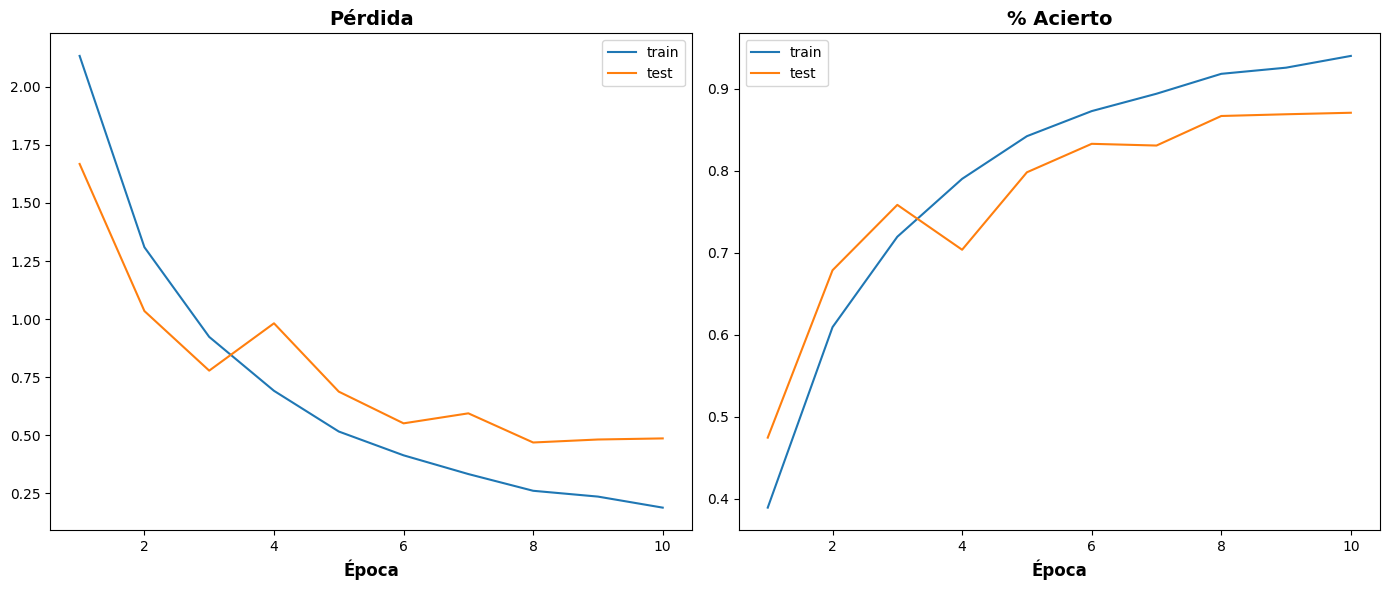

In [ ]:
graficar_historial_entrenamiento(hist_sin_aug_4)

En el cuarto modelo, se puede observar que las curvas de pérdida y acierto en entrenamiento muestran una mejora constante, lo que indica que el modelo está aprendiendo progresivamente los patrones del conjunto de entrenamiento. Sin embargo, las curvas de validación no logran converger de forma adecuada y presentan fluctuaciones a lo largo del proceso. Esta diferencia entre ambas curvas (entrenamiento y validación) sugiere que el modelo también incurre en sobreajuste, tal como ocurrió con el tercer modelo.

Ambos modelos presentan comportamientos similares. A pesar de que el cuarto modelo alcanza un mejor ajuste en entrenamiento, las curvas de validación en ambos casos muestran una separación con respecto al entrenamiento que revela sobreajuste. Por lo tanto, ninguno de los dos se posiciona como claramente superior en términos de capacidad de generalización.

In [ ]:
df_metricas_red_sin_augmentation_4 = crear_df_metricas(hist_sin_aug_4, "Cuarta_red_sin_aug")

,Métrica,Cuarta_red_sin_aug
0,accuracy,0.940104
1,loss,0.188220
2,precision,0.955631
3,recall,0.927137
4,val_accuracy,0.870755
5,val_loss,0.486285
6,val_precision,0.902053
7,val_recall,0.855752


En cuanto a las métricas generales, el cuarto modelo muestra una mejora  respecto al desempeño en entrenamiento, alcanzando una mayor precisión, exactitud y recall en comparación con el tercer modelo. La pérdida también se reduce considerablemente, lo que indica un ajuste más eficiente a los datos de entrenamiento. Sin embargo, al observar las métricas de validación, si bien hay un leve aumento en accuracy, recall y pérdida la mejora no es tan marcada como en el conjunto de entrenamiento, lo cual refuerza los indicios de sobreajuste que ya se evidencian en los gráficos anteriores.

Esta evolución en el rendimiento puede atribuirse a la incorporación de capas de batch normalization tras cada capa convolucional y densa, lo que contribuye a una propagación más estable del gradiente y una convergencia más rápida. La arquitectura también mantiene un buen esquema de dropout, lo que busca mitigar el sobreajuste, aunque en este caso no logra resolverlo por completo.

El cuarto modelo presenta una arquitectura más refinada que facilita el aprendizaje durante el entrenamiento, reflejado en métricas más elevadas. Sin embargo, el rendimiento en validación no se distancia lo suficiente del tercer modelo como para considerarlo una mejora sustancial en términos de generalización. Esto sugiere que, aunque el modelo es más potente, sigue siendo susceptible a sobreajuste y requiere ajustes adicionales.

##Modelo 5

En esta quinta versión del modelo sin data augmentation, se conserva la estructura general utilizada en el modelo anterior, incluyendo el uso de Batch Normalization y Dropout como mecanismos de regularización. Dado que el modelo anterior (modelo 4) no logró mejoras significativas en cuanto al sobreajuste, en esta versión se optó por aumentar la profundidad de la red mediante la incorporación de una cuarta capa convolucional. Este cambio tiene como objetivo permitir una extracción de características más complejas, lo cual podría ayudar a mejorar la capacidad generalizadora del modelo. A pesar de que se mantienen las mismas tasas de dropout, se espera que la adición de una capa convolucional extra contribuya a disminuir el sobreajuste observado previamente, sin alterar significativamente el resto de los hiperparámetros del modelo.

In [ ]:
red_sin_augmentation_5 = keras.Sequential(name="Quinta_red_sin_aug")
red_sin_augmentation_5.add(Input(shape=(64, 64, 3), name="entrada"))

red_sin_augmentation_5.add(Conv2D(32, (3, 3), activation='relu', padding='same', name="convolucion_1"))
red_sin_augmentation_5.add(BatchNormalization(name="batchNormalization_1"))
red_sin_augmentation_5.add(MaxPooling2D((2, 2), name="pooling_1"))

red_sin_augmentation_5.add(Conv2D(64, (3, 3), activation='relu', padding='same', name="convolucion_2"))
red_sin_augmentation_5.add(BatchNormalization(name="batchNormalization_2"))
red_sin_augmentation_5.add(MaxPooling2D((2, 2), name="pooling_2"))

red_sin_augmentation_5.add(Conv2D(128, (3, 3), activation='relu', padding='same', name="convolucion_3"))
red_sin_augmentation_5.add(BatchNormalization(name="batchNormalization_3"))
red_sin_augmentation_5.add(MaxPooling2D((2, 2), name="pooling_3"))

red_sin_augmentation_5.add(Conv2D(128, (3, 3), activation='relu', padding='same', name="convolucion_4"))
red_sin_augmentation_5.add(BatchNormalization(name="batchNormalization_4"))
red_sin_augmentation_5.add(MaxPooling2D((2, 2), name="pooling_4"))

red_sin_augmentation_5.add(Flatten(name="Flatten"))

red_sin_augmentation_5.add(Dropout(0.4, name="dropout_1"))
red_sin_augmentation_5.add(Dense(256, activation='relu', name="CapaOculta_1"))
red_sin_augmentation_5.add(BatchNormalization(name="batchNormalization_5"))

red_sin_augmentation_5.add(Dropout(0.4, name="dropout_2"))
red_sin_augmentation_5.add(Dense(128, activation='relu', name="CapaOculta_2"))
red_sin_augmentation_5.add(BatchNormalization(name="batchNormalization_6"))

red_sin_augmentation_5.add(Dropout(0.3, name="dropout_3"))
red_sin_augmentation_5.add(Dense(18, activation='softmax', name="salida"))

red_sin_augmentation_5.summary()

Model: "Quinta_red_sin_aug"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ convolucion_1 (Conv2D)               │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batchNormalization_1                 │ (None, 64, 64, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling_1 (MaxPooling2D)             │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ convolucion_2 (Conv2D)               │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batchNormalization_2                 │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling_2 (MaxPooling2D)             │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ convolucion_3 (Conv2D)               │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batchNormalization_3                 │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling_3 (MaxPooling2D)             │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ convolucion_4 (Conv2D)               │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batchNormalization_4                 │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling_4 (MaxPooling2D)             │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ CapaOculta_1 (Dense)                 │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batchNormalization_5                 │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ CapaOculta_2 (Dense)                 │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batchNormalization_6                 │ (None, 128)                 │             5

 Total params: 803,538 (3.07 MB)

 Trainable params: 802,066 (3.06 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [ ]:
np.random.seed(29)
tf.random.set_seed(29)

red_sin_augmentation_5.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'precision', 'recall']
)

hist_sin_aug_5 = red_sin_augmentation_5.fit(
    X_train_noaug, y_train_noaug,
    batch_size=32,
    epochs=10,
    validation_data=(X_val_noaug, y_val_noaug)
)

Epoch 1/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - accuracy: 0.2347 - loss: 2.7946 - precision: 0.4043 - recall: 0.1001 - val_accuracy: 0.3788 - val_loss: 2.0605 - val_precision: 0.6308 - val_recall: 0.2132
Epoch 2/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.5437 - loss: 1.5077 - precision: 0.7524 - recall: 0.3895 - val_accuracy: 0.7028 - val_loss: 1.0118 - val_precision: 0.8666 - val_recall: 0.5644
Epoch 3/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6733 - loss: 1.0853 - precision: 0.8215 - recall: 0.5555 - val_accuracy: 0.7597 - val_loss: 0.7867 - val_precision: 0.8776 - val_recall: 0.6702
Epoch 4/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7544 - loss: 0.8071 - precision: 0.8624 - recall: 0.6717 - val_accuracy: 0.7455 - val_loss: 0.8493 - val_precision: 0.8591 - val_recall: 0.6499
Epoch 5/10
475/475 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8031 - loss: 0.6425 - precision: 0.8851 - recall: 0.7433 - val_accuracy: 0.8128 - val_lo

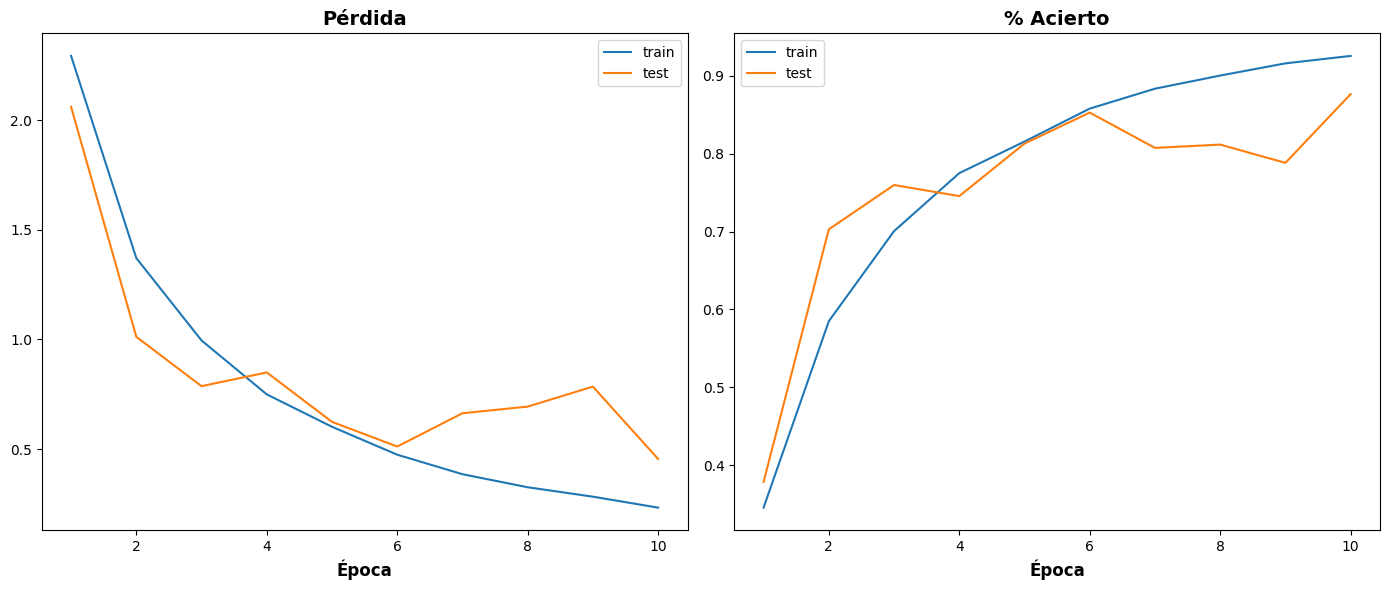

In [ ]:
graficar_historial_entrenamiento(hist_sin_aug_5)

Podemos observar que el desempeño del quinto modelo es bastante similar al del cuarto modelo en términos de las curvas de pérdida y acierto. Aunque el sobreajuste se redujo levemente respecto al cuarto modelo, aún se mantiene presente, evidenciado por las curvas de entrenamiento y validación.

En cuanto a la pérdida, el quinto modelo presenta un valor algo más alto durante el entrenamiento comparado con el cuarto, pero la diferencia entre la pérdida de entrenamiento y validación es menor, lo que indica que la brecha entre ambas se ha reducido. De manera similar, el accuracy también muestra un comportamiento más equilibrado, con menor separación entre entrenamiento y validación.

Sin embargo, a pesar de esta reducción en la brecha entre entrenamiento y validación, los valores de desempeño empeoraron ligeramente en el quinto modelo, presentando una menor exactitud (accuracy) y una mayor pérdida (loss) en comparación con el cuarto modelo. Esto indica que, si bien la generalización mejoró un poco, el modelo sacrificó algo de rendimiento global para lograrlo.

In [ ]:
df_metricas_red_sin_augmentation_5 = crear_df_metricas(hist_sin_aug_5, "Quinta_red_sin_aug")

,Métrica,Quinta_red_sin_aug
0,accuracy,0.925295
1,loss,0.232798
2,precision,0.946272
3,recall,0.908840
4,val_accuracy,0.876283
5,val_loss,0.454696
6,val_precision,0.908713
7,val_recall,0.862069


Esta red profundiza aún más la arquitectura anterior al incorporar una cuarta capa convolucional (128 filtros), manteniendo Batch Normalization y Dropout. El objetivo de esta modificación es incrementar la capacidad representacional del modelo y, potencialmente, mejorar el rendimiento sobre clases más complejas o difíciles.

La Quinta_red_sin_aug es el modelo más robusto y preciso entre las redes sin aumento de datos. Es la opción más equilibrada si no se utiliza aumento de datos.

En cuanto a las métricas generales, el quinto modelo presenta un desempeño en entrenamiento ligeramente inferior al cuarto modelo, con valores menores en accuracy, precisión y recall, y un aumento en la pérdida. Esto indica que, aunque el ajuste a los datos de entrenamiento no es tan preciso como en el modelo anterior, el modelo sigue aprendiendo adecuadamente.

Respecto a las métricas de validación, el quinto modelo mejora levemente en accuracy, precisión, recall y pérdida en comparación con el cuarto modelo. Esta mejora sugiere una mejor capacidad de generalización y un menor sobreajuste, evidenciado por la reducción de la brecha entre los valores de entrenamiento y validación.

Arquitectónicamente, el quinto modelo mantiene la misma estructura que el cuarto modelo, pero con la adición de un bloque extra compuesto por una capa convolucional seguida de batch normalization. Esta modificación parece haber contribuido a un leve aprendizaje, que ayuda a controlar mejor el sobreajuste sin perder la capacidad de generalizar a datos no vistos.

En conclusión, el quinto modelo ofrece un equilibrio más favorable entre ajuste y generalización, sacrificando un poco de rendimiento en entrenamiento para lograr mejores valores en validación, lo cual lo hace ligeramente mejor que el anterior



#Comparacion de modelos sin data aug


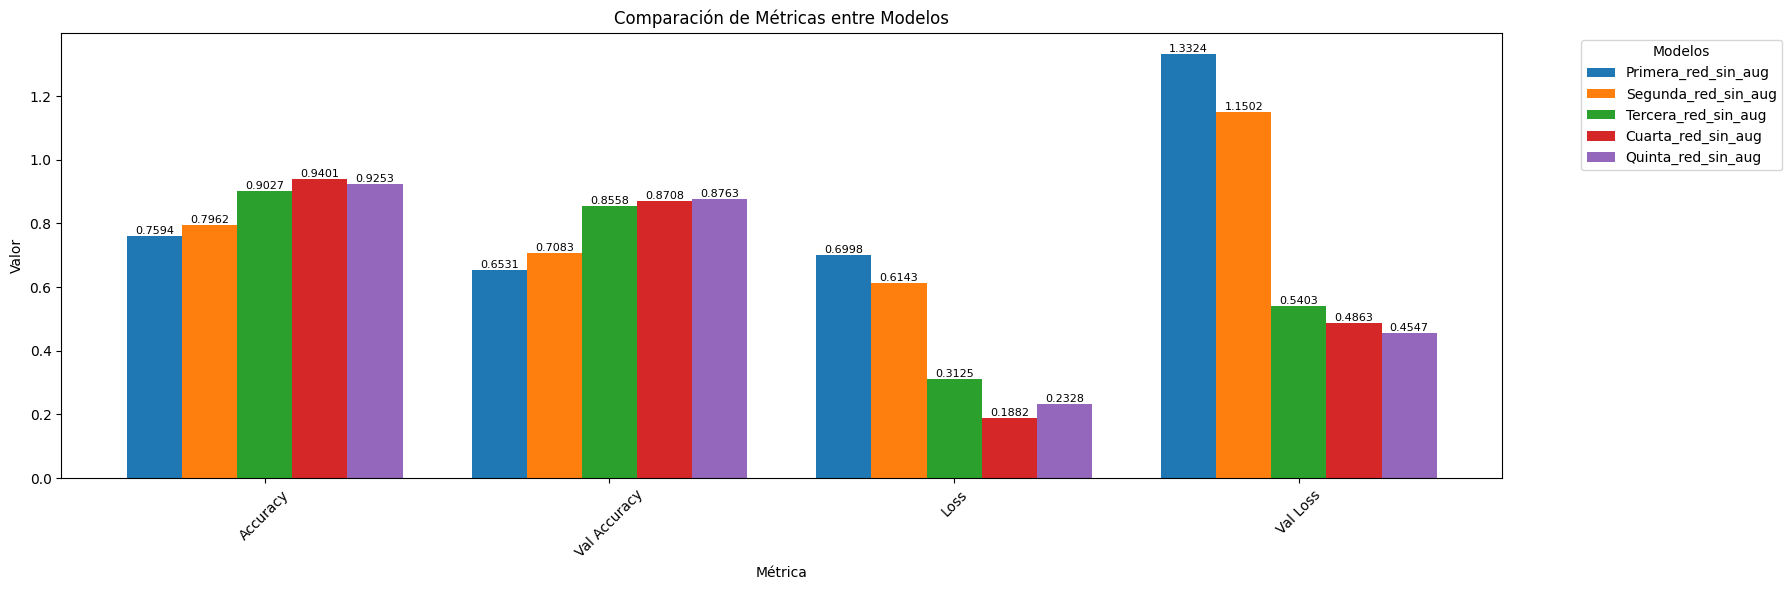

In [ ]:
historiales = [
    hist_sin_aug.history,
    hist_sin_aug_2.history,
    hist_sin_aug_3.history,
    hist_sin_aug_4.history,
    hist_sin_aug_5.history
]

nombres_modelos = [
    'Primera_red_sin_aug',
    'Segunda_red_sin_aug',
    'Tercera_red_sin_aug',
    'Cuarta_red_sin_aug',
    'Quinta_red_sin_aug'
]

df_resultado = graficar_comparacion_modelos(historiales, nombres_modelos)

Al observar el gráfico comparativo y resumen de métricas, se puede apreciar una evolución progresiva en el desempeño de los modelos a medida que se fueron introduciendo mejoras en la arquitectura. Los primeros dos modelos muestran un desempeño más pobre, con una brecha considerable entre las métricas de entrenamiento y validación, lo cual evidencia un sobreajuste temprano y una capacidad limitada para generalizar.

Con el tercer modelo se introduce un cambio más significativo al alcanzar un mejor ajuste durante el entrenamiento y se logra reducir notablemente la diferencia entre entrenamiento y validación. Esto indica una mejora clara tanto en la precisión como en el control del sobreajuste.

El cuarto modelo continúa esta tendencia positiva, presentando un mejor ajuste en entrenamiento y mejoras más sutiles en validación. No obstante, la distancia entre las métricas de ambos conjuntos vuelve a ampliarse ligeramente.

Finalmente, el quinto modelo demuestra un comportamiento más equilibrado. Si bien no alcanza el mismo nivel de ajuste que el cuarto modelo durante el entrenamiento, logra un mejor rendimiento en validación, con métricas más cercanas entre ambos conjuntos. Esto refleja un avance en términos de generalización, mostrando que el modelo es más estable frente a datos nuevos. En resumen, a lo largo de los cinco modelos se observa una mejora clara en precisión y pérdida, acompañada de un esfuerzo progresivo por mitigar el sobreajuste, siendo el quinto modelo el que presenta un compromiso más equilibrado entre ajuste y generalización.

In [ ]:
modelos_data_sin_aug = [
    {
        'Nombre': 'Primera red sin aug','Capas Convolucionales': '1 (32, 3×3)','Capas MaxPooling': '1 (2×2)','Batch Normalization': 'No','Capas Ocultas': '5 (512, 256, 128, 64, 32)','Dropout': '5 (4×0.3, 1×0.35)',
        **metricas(hist_sin_aug)
    },
    {
        'Nombre': 'Segunda red sin aug','Capas Convolucionales': '2 (32, 64, 3×3)','Capas MaxPooling': '2 (2×2)','Batch Normalization': 'No','Capas Ocultas': '5 (512, 256, 128, 64, 32)','Dropout': '5 (4×0.3, 1×0.35)',
        **metricas(hist_sin_aug_2)
    },
    {
        'Nombre': 'Tercera red sin aug','Capas Convolucionales': '3 (32, 64, 128, 3×3)','Capas MaxPooling': '3 (2×2)','Batch Normalization': 'No','Capas Ocultas': '2 (256, 128)','Dropout': '3 (2×0.4, 1×0.3)',
        **metricas(hist_sin_aug_3)
    },
    {
        'Nombre': 'Cuarta red sin aug','Capas Convolucionales': '3 (32, 64, 128, 3×3)','Capas MaxPooling': '3 (2×2)','Batch Normalization': '5 capas','Capas Ocultas': '2 (256, 128)','Dropout': '3 (2×0.4, 1×0.3)',
        **metricas(hist_sin_aug_4)
    },
    {
        'Nombre': 'Quinta red sin aug','Capas Convolucionales': '4 (32, 64, 128, 128, 3×3)','Capas MaxPooling': '4 (2×2)','Batch Normalization': '6 capas','Capas Ocultas': '2 (256, 128)','Dropout': '3 (2×0.4, 1×0.3)',
        **metricas(hist_sin_aug_5)
    }
]

modelos_sin_aug = pd.DataFrame(modelos_data_sin_aug)

modelos_sin_aug

,Nombre,Capas Convolucionales,Capas MaxPooling,Batch Normalization,Capas Ocultas,Dropout,Train Accuracy,Validation Accuracy,Train Loss,Validation Loss
0,Primera red sin aug,"1 (32, 3×3)",1 (2×2),No,"5 (512, 256, 128, 64, 32)","5 (4×0.3, 1×0.35)",0.7594,0.6531,0.6998,1.3324
1,Segunda red sin aug,"2 (32, 64, 3×3)",2 (2×2),No,"5 (512, 256, 128, 64, 32)","5 (4×0.3, 1×0.35)",0.7962,0.7083,0.6143,1.1502
2,Tercera red sin aug,"3 (32, 64, 128, 3×3)",3 (2×2),No,"2 (256, 128)","3 (2×0.4, 1×0.3)",0.9027,0.8558,0.3125,0.5403
3,Cuarta red sin aug,"3 (32, 64, 128, 3×3)",3 (2×2),5 capas,"2 (256, 128)","3 (2×0.4, 1×0.3)",0.9401,0.8708,0.1882,0.4863
4,Quinta red sin aug,"4 (32, 64, 128, 128, 3×3)",4 (2×2),6 capas,"2 (256, 128)","3 (2×0.4, 1×0.3)",0.9253,0.8763,0.2328,0.4547


A lo largo de los cinco modelos se observa una evolución creciente en complejidad arquitectónica y una mejora general en el rendimiento. Los dos primeros modelos, con estructuras más simples y sin batch normalization, muestran bajos niveles de precisión y un fuerte sobreajuste, debido en parte a la falta de técnicas como el data augmentation que podrían haber mejorado la generalización.

El tercer modelo marca una mejora importante al aumentar las capas convolucionales y reducir las ocultas, lo que permite una extracción más eficiente de características. A pesar de no contar aún con batch normalization, sus resultados en validación mejoran de forma significativa.

Con la introducción de batch normalization en el cuarto modelo, se estabiliza el aprendizaje y se reduce aún más la pérdida, aunque el sobreajuste persiste levemente. Finalmente, el quinto modelo agrega un bloque convolucional adicional, lo que permite una mejor generalización: si bien las métricas de entrenamiento bajan ligeramente respecto al cuarto, se logra un desempeño más equilibrado frente a los datos de validación.

En conjunto, las mejoras estructurales progresivas y el uso de regularización han fortalecido el desempeño de los modelos, pero la ausencia de data augmentation sigue siendo un factor limitante en la capacidad de generalización.


Conclusión Final:

El mejor modelo fue la Quinta red sin data augmentation, gracias a su arquitectura profunda, uso estratégico de Batch Normalization y regularización con Dropout. Esta combinación permitió un buen equilibrio entre rendimiento en entrenamiento y generalización en validación, sin caer en sobreajuste.

In [ ]:
modelos = [red_sin_augmentation, red_sin_augmentation_2, red_sin_augmentation_3, red_sin_augmentation_4, red_sin_augmentation_5]

val_accuracies = [h['val_accuracy'][-1] for h in historiales]

indice_mejor = val_accuracies.index(max(val_accuracies))

mejor_modelo = modelos[indice_mejor]
nombre_mejor_modelo = mejor_modelo.name
hist_mejor = historiales[indice_mejor]


print(f"Mejor modelo según mayor Val Accuracy:")
print(f"Modelo: {nombre_mejor_modelo}")

mejor_modelo.save("modelo_mejor.keras")

*#Voy a dejar este de abajo por si queremos hablar de las otras metricas

In [ ]:
modelos = [red_sin_augmentation, red_sin_augmentation_2, red_sin_augmentation_3, red_sin_augmentation_4, red_sin_augmentation_5]

val_accuracies = [h['val_accuracy'][-1] for h in historiales]

indice_mejor = val_accuracies.index(max(val_accuracies))

mejor_modelo = modelos[indice_mejor]
nombre_mejor_modelo = mejor_modelo.name
hist_mejor = historiales[indice_mejor]

acc = hist_mejor['accuracy'][-1]
val_acc = hist_mejor['val_accuracy'][-1]
loss = hist_mejor['loss'][-1]
val_loss = hist_mejor['val_loss'][-1]
recall = hist_mejor['recall'][-1]
val_recall = hist_mejor['val_recall'][-1]
precision = hist_mejor['precision'][-1]
val_precision = hist_mejor['val_precision'][-1]
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
val_f1_score = 2 * (val_precision * val_recall) / (val_precision + val_recall) if (val_precision + val_recall) > 0 else 0


print(f"Mejor modelo según mayor Val Accuracy:")
print(f"Modelo:         {nombre_mejor_modelo}")
print(f"Accuracy:       {acc:.4f}")
print(f"Val Accuracy:   {val_acc:.4f}")
print(f"Loss:           {loss:.4f}")
print(f"Val Loss:       {val_loss:.4f}")
print(f"Recall:         {recall:.4f}")
print(f"val_Recall:     {val_recall:.4f}")
print(f"Precision:      {precision:.4f}")
print(f"val_Precision:  {val_precision:.4f}")
print(f"F1 Score:       {f1_score:.4f}")
print(f"val_F1 Score:   {val_f1_score:.4f}")

mejor_modelo.save("modelo_mejor.keras")

Mejor modelo según mayor Val Accuracy:
Modelo:         Quinta_red_sin_aug
Accuracy:       0.9253
Val Accuracy:   0.8763
Loss:           0.2328
Val Loss:       0.4547
Recall:         0.9088
val_Recall:     0.8621
Precision:      0.9463
val_Precision:  0.9087
F1 Score:       0.9272
val_F1 Score:   0.8848


**Conclusión final de modelos sin data augmentation**

Tras evaluar cinco modelos con arquitecturas progresivamente más complejas, el mejor desempeño se obtuvo con el quinto modelo, que alcanzó la mayor precisión en validación. Este resultado refleja una mejora sostenida en la capacidad de generalización gracias a la incorporación de batch normalization y más bloques convolucionales. Sin embargo, la ausencia de data augmentation limitó el control del sobreajuste, especialmente en los primeros modelos.

Con esta base establecida, el siguiente paso es incorporar data augmentation para potenciar aún más los modelos y mejorar su capacidad de adaptación frente a datos no vistos, manteniendo el mismo proceso de evaluación.

Debemos borrar los datos generados sin data aug, como no los usaremos más, colab se queda sin memoria y debemos aumentarla para seguir con los modelos con data aug.

In [ ]:
del X_train_noaug
del y_train_noaug
del X_val_noaug
del y_val_noaug
import gc
gc.collect()

12571

#Modelos con data AUG

##Modelo 1

Con el objetivo de mejorar la capacidad de generalización del modelo frente a datos no vistos, en esta nueva fase se incorpora data augmentation. Esta técnica busca enriquecer el conjunto de entrenamiento mediante transformaciones aleatorias sobre las imágenes originales (como rotaciones, giros o escalados), lo cual permite simular una mayor diversidad de datos sin necesidad de recolectar nuevas muestras. De este modo, se espera disminuir el sobreajuste observado en los modelos entrenados previamente sin data augumentation.

Este primer modelo con data augmentation mantiene la misma arquitectura que el modelo base utilizado en la fase anterior: una capa convolucional seguida de pooling, con cinco capas densas y dropout como estrategia de regularización. Al conservar la estructura original, se busca establecer una comparación directa y observar específicamente el impacto del data augmentation sobre el rendimiento del modelo, sin introducir aún cambios en la arquitectura. Esta etapa representa el primer paso para explorar cómo las transformaciones artificiales del conjunto de datos pueden mejorar la robustez del modelo antes de introducir arquitecturas más profundas o técnicas adicionales como Batch Normalization.

In [ ]:
red_con_augmentation = keras.Sequential(name="Primera_red_con_aug")
red_con_augmentation.add(Input(shape=(64, 64, 3), name="entrada"))

red_con_augmentation.add(Conv2D(32, (3, 3), activation='relu', padding='same', name="convolucion_1"))
red_con_augmentation.add(MaxPooling2D((2, 2), name="pooling_1"))

red_con_augmentation.add(Flatten(name="flatten_1"))

red_con_augmentation.add(Dropout(0.3, name="dropout_1"))
red_con_augmentation.add(Dense(512, activation='relu', name="CapaOculta_1"))
red_con_augmentation.add(Dropout(0.3, name="dropout_2"))
red_con_augmentation.add(Dense(256, activation='relu', name="CapaOculta_2"))
red_con_augmentation.add(Dense(128, activation='relu', name="CapaOculta_3"))
red_con_augmentation.add(Dropout(0.3, name="dropout_3"))
red_con_augmentation.add(Dense(64, activation='relu', name="CapaOculta_4"))
red_con_augmentation.add(Dropout(0.3, name="dropout_4"))
red_con_augmentation.add(Dense(32, activation='relu', name="CapaOculta_5"))
red_con_augmentation.add(Dropout(0.35, name="dropout_5"))
red_con_augmentation.add(Dense(18, activation='softmax', name="salida"))
red_con_augmentation.summary()

Model: "Primera_red_con_aug"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ convolucion_1 (Conv2D)               │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling_1 (MaxPooling2D)             │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ CapaOculta_1 (Dense)                 │ (None, 512)                 │      16,777,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ CapaOculta_2 (Dense)                 │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ CapaOculta_3 (Dense)                 │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ CapaOculta_4 (Dense)                 │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ CapaOculta_5 (Dense)                 │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ salida (Dense)                       │ (None, 18)                  │             594 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,953,778 (64.67 MB)

 Trainable params: 16,953,778 (64.67 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
np.random.seed(29)
tf.random.set_seed(29)

red_con_augmentation.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'precision', 'recall']
)

hist_con_aug = red_con_augmentation.fit(
    X_train, y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_val,y_val)
)

Epoch 1/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 27s 19ms/step - accuracy: 0.0893 - loss: 2.8682 - precision: 0.3357 - recall: 0.0067 - val_accuracy: 0.2795 - val_loss: 2.2771 - val_precision: 0.8909 - val_recall: 0.0717
Epoch 2/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 28s 11ms/step - accuracy: 0.2691 - loss: 2.3037 - precision: 0.7260 - recall: 0.0904 - val_accuracy: 0.4315 - val_loss: 1.8427 - val_precision: 0.8433 - val_recall: 0.2163
Epoch 3/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.4163 - loss: 1.8968 - precision: 0.7922 - recall: 0.2169 - val_accuracy: 0.5114 - val_loss: 1.5802 - val_precision: 0.8526 - val_recall: 0.3197
Epoch 4/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.5089 - loss: 1.5994 - precision: 0.8237 - recall: 0.3152 - val_accuracy: 0.5585 - val_loss: 1.4535 - val_precision: 0.8532 - val_recall: 0.3833
Epoch 5/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.5731 - loss: 1.3934 - precision: 0.8382 - recall: 0.3923 - val_accuracy: 0

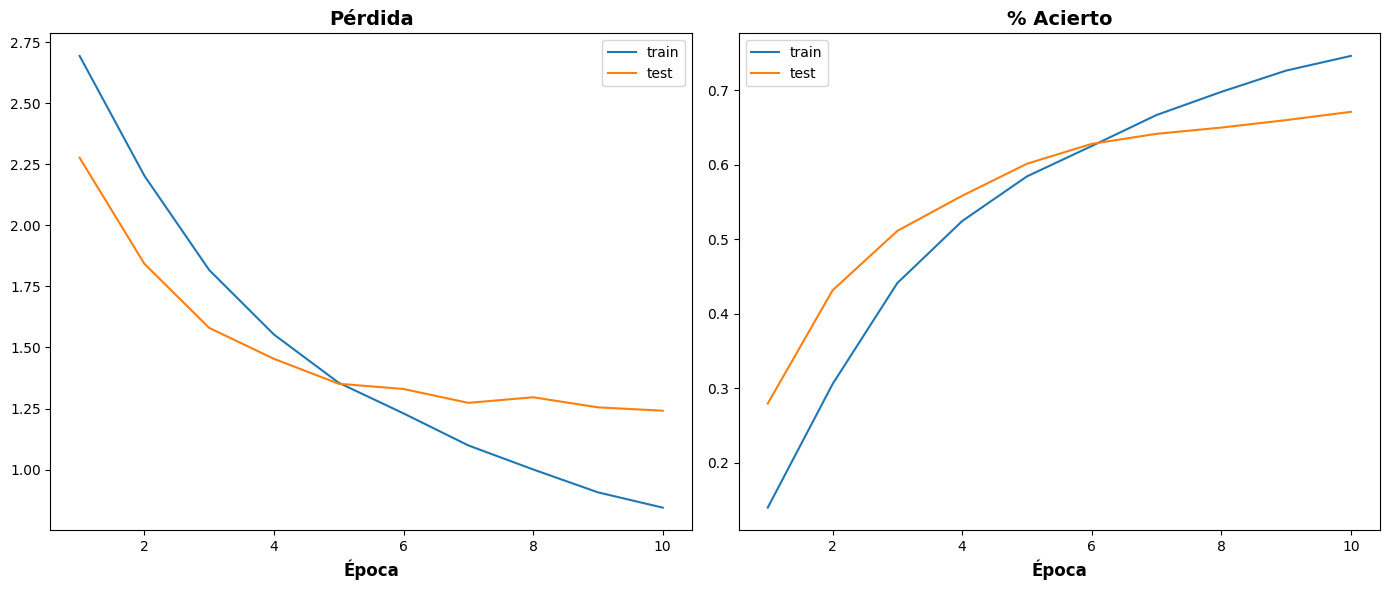

In [ ]:
graficar_historial_entrenamiento(hist_con_aug)

In [ ]:
df_metricas_red_con_augmentation = crear_df_metricas(hist_con_aug, "Primera_red_con_aug")

,Métrica,Primera_red_con_aug
0,accuracy,0.746367
1,loss,0.843974
2,precision,0.879436
3,recall,0.642106
4,val_accuracy,0.671284
5,val_loss,1.241021
6,val_precision,0.823849
7,val_recall,0.581870


*pequeña conclucion

*pequeña conclucion

*pequeña conclucion

## Modelo 2

Para la segunda red con data augmentation, se incorporó una capa convolucional adicional seguida de su respectivo max pooling al inicio de la arquitectura. Esta modificación permite una extracción de características más profunda y detallada antes de la etapa de aplanado (flatten), con el fin de mejorar la capacidad del modelo para generalizar, evitar el sobreajuste y captar patrones complejos en las imágenes. El resto de la estructura, incluyendo las capas densas y de dropout, se mantuvo igual respecto a la primera red con data augmentation.

In [ ]:
red_con_augmentation_2 = keras.Sequential(name="Segunda_red_con_aug")
red_con_augmentation_2.add(Input(shape=(64, 64, 3), name="entrada"))

red_con_augmentation_2.add(Conv2D(32, (3, 3), activation='relu', padding='same', name="convolucion_1"))
red_con_augmentation_2.add(MaxPooling2D((2, 2), name="pooling_1"))

red_con_augmentation_2.add(Conv2D(64, (3, 3), activation='relu', padding='same', name="convolucion_2"))
red_con_augmentation_2.add(MaxPooling2D((2, 2), name="pooling_2"))

red_con_augmentation_2.add(Flatten(name="flatten_1"))

red_con_augmentation_2.add(Dropout(0.3, name="dropout_1"))
red_con_augmentation_2.add(Dense(512, activation='relu', name="CapaOculta_1"))

red_con_augmentation_2.add(Dropout(0.3, name="dropout_2"))
red_con_augmentation_2.add(Dense(256, activation='relu', name="CapaOculta_2"))

red_con_augmentation_2.add(Dense(128, activation='relu', name="CapaOculta_3"))

red_con_augmentation_2.add(Dropout(0.3, name="dropout_3"))
red_con_augmentation_2.add(Dense(64, activation='relu', name="CapaOculta_4"))

red_con_augmentation_2.add(Dropout(0.3, name="dropout_4"))
red_con_augmentation_2.add(Dense(32, activation='relu', name="CapaOculta_5"))

red_con_augmentation_2.add(Dropout(0.35, name="dropout_5"))

red_con_augmentation_2.add(Dense(18, activation='softmax', name="salida"))

red_con_augmentation_2.summary()

Model: "Segunda_red_con_aug"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ convolucion_1 (Conv2D)               │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling_1 (MaxPooling2D)             │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ convolucion_2 (Conv2D)               │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling_2 (MaxPooling2D)             │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ CapaOculta_1 (Dense)                 │ (None, 512)                 │       8,389,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ CapaOculta_2 (Dense)                 │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ CapaOculta_3 (Dense)                 │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ CapaOculta_4 (Dense)                 │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ CapaOculta_5 (Dense)                 │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ salida (Dense)                       │ (None, 18)                  │             594 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,583,666 (32.74 MB)

 Trainable params: 8,583,666 (32.74 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
np.random.seed(29)
tf.random.set_seed(29)

red_con_augmentation_2.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'precision', 'recall']
)

hist_con_aug_2 = red_con_augmentation_2.fit(
    X_train, y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_val,y_val)
)

Epoch 1/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - accuracy: 0.0852 - loss: 2.8409 - precision: 0.4612 - recall: 0.0104 - val_accuracy: 0.2316 - val_loss: 2.4340 - val_precision: 0.8666 - val_recall: 0.0843
Epoch 2/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 30s 9ms/step - accuracy: 0.2378 - loss: 2.4559 - precision: 0.7595 - recall: 0.0924 - val_accuracy: 0.3328 - val_loss: 2.1601 - val_precision: 0.9036 - val_recall: 0.1414
Epoch 3/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.3294 - loss: 2.1797 - precision: 0.8123 - recall: 0.1564 - val_accuracy: 0.4189 - val_loss: 1.8038 - val_precision: 0.8820 - val_recall: 0.2460
Epoch 4/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.4188 - loss: 1.8704 - precision: 0.8294 - recall: 0.2391 - val_accuracy: 0.5390 - val_loss: 1.4503 - val_precision: 0.8559 - val_recall: 0.3407
Epoch 5/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5112 - loss: 1.5656 - precision: 0.8301 - recall: 0.3272 - val_accuracy: 0.5669

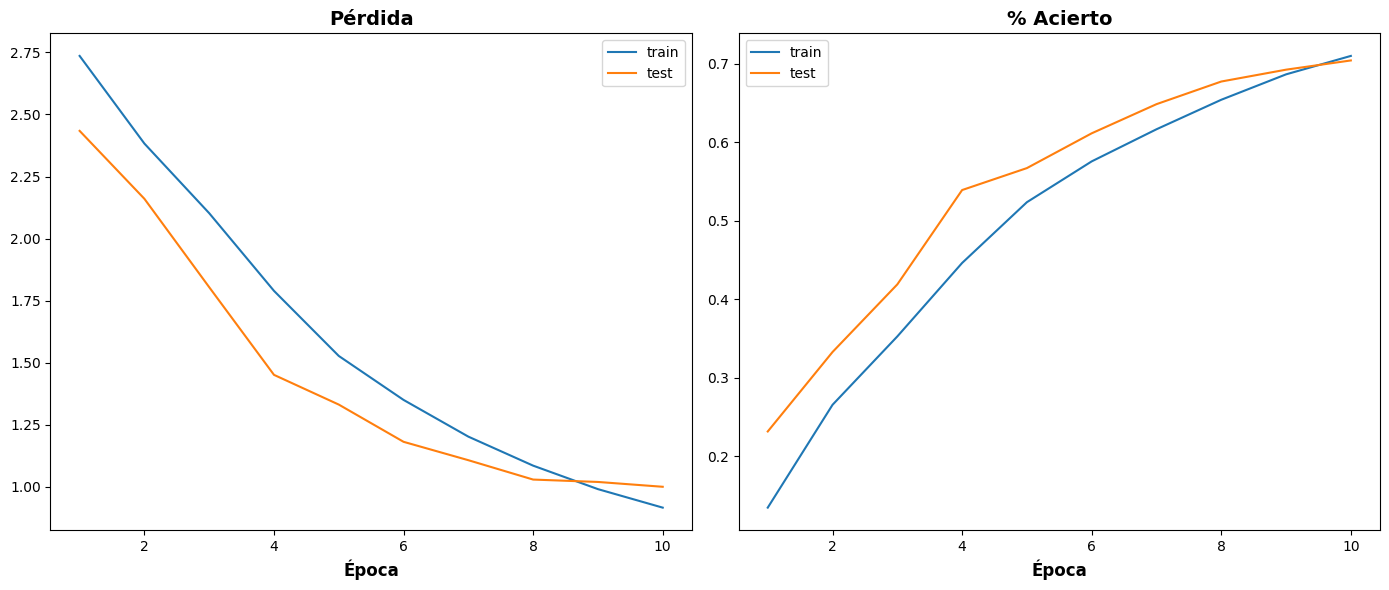

In [ ]:
graficar_historial_entrenamiento(hist_con_aug_2)

In [ ]:
df_metricas_red_sin_augmentation_2 = crear_df_metricas(hist_con_aug_2, "Segunda_red_con_aug")

,Métrica,Segunda_red_con_aug
0,accuracy,0.709696
1,loss,0.914989
2,precision,0.863520
3,recall,0.586111
4,val_accuracy,0.703933
5,val_loss,0.999076
6,val_precision,0.852405
7,val_recall,0.607099


*pequeña conclucion

*pequeña conclucion

*pequeña conclucion

##Modelo 3

La tercera red con data augmentation amplía la arquitectura añadiendo una tercera capa convolucional con su respectivo max pooling, lo que permite captar patrones más complejos en las imágenes. Para equilibrar esta mayor profundidad, se redujo el número de capas densas a dos, buscando evitar el sobreajuste que evidenciamos en el modelo anterior y mantener un buen rendimiento. Las tasas de dropout se incrementaron ligeramente, fortaleciendo la regularización del modelo. Por otra parte, el tamaño de entrada y otros hiperparámetros fundamentales se conservaron igual que en las redes anteriores para asegurar una comparación coherente entre los modelos.

In [ ]:
red_con_augmentation_3 = keras.Sequential(name="Tercera_red_con_aug")
red_con_augmentation_3.add(Input(shape=(64, 64, 3), name="entrada"))

red_con_augmentation_3.add(Conv2D(32, (3, 3), activation='relu', padding='same', name="convolucion_1"))
red_con_augmentation_3.add(MaxPooling2D((2, 2), name="pooling_1"))

red_con_augmentation_3.add(Conv2D(64, (3, 3), activation='relu', padding='same', name="convolucion_2"))
red_con_augmentation_3.add(MaxPooling2D((2, 2), name="pooling_2"))

red_con_augmentation_3.add(Conv2D(128, (3, 3), activation='relu', padding='same', name="convolucion_3"))
red_con_augmentation_3.add(MaxPooling2D((2, 2), name="pooling_3"))

red_con_augmentation_3.add(Flatten(name="flatten_1"))

red_con_augmentation_3.add(Dropout(0.4, name="dropout_1"))
red_con_augmentation_3.add(Dense(256, activation='relu', name="CapaOculta_1"))
red_con_augmentation_3.add(Dropout(0.4, name="dropout_2"))
red_con_augmentation_3.add(Dense(128, activation='relu', name="CapaOculta_2"))
red_con_augmentation_3.add(Dropout(0.3, name="dropout_3"))
red_con_augmentation_3.add(Dense(18, activation='softmax', name="salida"))

red_con_augmentation_3.summary()

Model: "Tercera_red_con_aug"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ convolucion_1 (Conv2D)               │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling_1 (MaxPooling2D)             │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ convolucion_2 (Conv2D)               │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling_2 (MaxPooling2D)             │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ convolucion_3 (Conv2D)               │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling_3 (MaxPooling2D)             │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ CapaOculta_1 (Dense)                 │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ CapaOculta_2 (Dense)                 │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ salida (Dense)                       │ (None, 18)                  │           2,322 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,225,874 (8.49 MB)

 Trainable params: 2,225,874 (8.49 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
np.random.seed(29)
tf.random.set_seed(29)

red_con_augmentation_3.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'precision', 'recall']
)

hist_con_aug_3 = red_con_augmentation_3.fit(
    X_train, y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_val,y_val)
)

Epoch 1/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.2659 - loss: 2.3639 - precision: 0.6837 - recall: 0.0995 - val_accuracy: 0.6519 - val_loss: 1.1358 - val_precision: 0.8745 - val_recall: 0.4850
Epoch 2/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6377 - loss: 1.1912 - precision: 0.8376 - recall: 0.4955 - val_accuracy: 0.7712 - val_loss: 0.7391 - val_precision: 0.8967 - val_recall: 0.6752
Epoch 3/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7426 - loss: 0.8279 - precision: 0.8746 - recall: 0.6507 - val_accuracy: 0.8355 - val_loss: 0.5425 - val_precision: 0.9232 - val_recall: 0.7698
Epoch 4/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8026 - loss: 0.6443 - precision: 0.8992 - recall: 0.7324 - val_accuracy: 0.8556 - val_loss: 0.4767 - val_precision: 0.9247 - val_recall: 0.8050
Epoch 5/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8375 - loss: 0.5271 - precision: 0.9110 - recall: 0.7841 - val_accuracy: 0.8788 

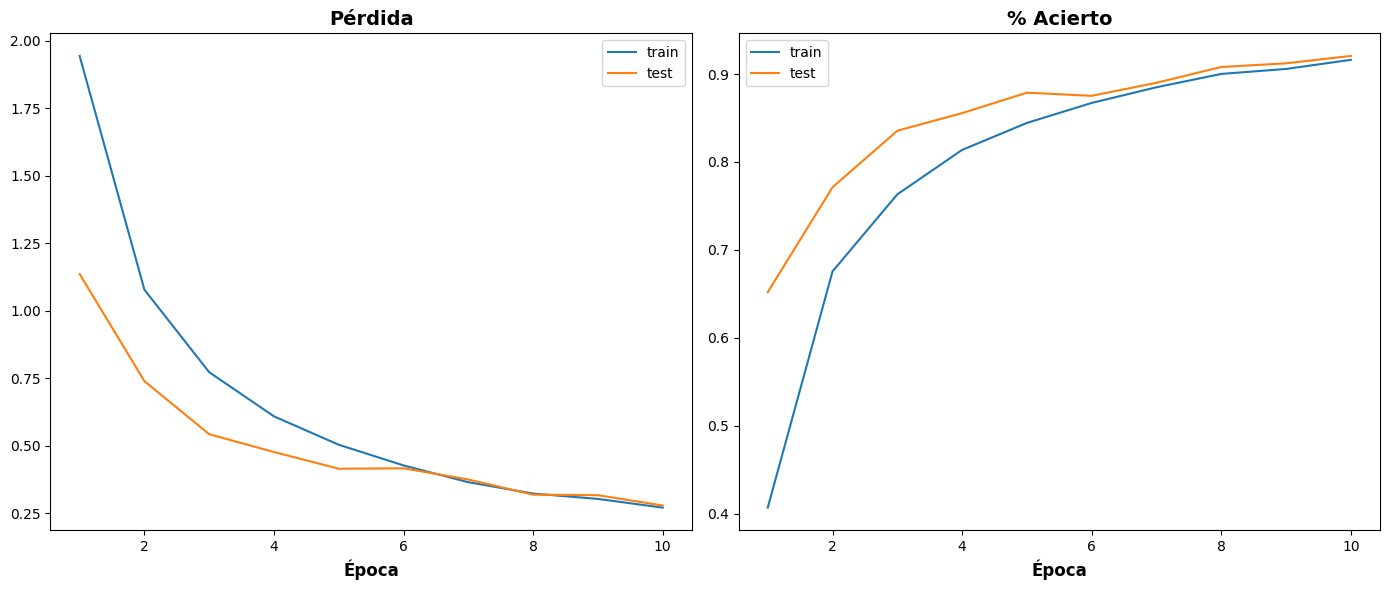

In [ ]:
graficar_historial_entrenamiento(hist_con_aug_3)

In [ ]:
df_metricas_red_sin_augmentation_3 = crear_df_metricas(hist_con_aug_3, "Tercera_red_con_aug")

,Métrica,Tercera_red_con_aug
0,accuracy,0.916146
1,loss,0.270747
2,precision,0.943366
3,recall,0.894101
4,val_accuracy,0.920604
5,val_loss,0.278596
6,val_precision,0.952262
7,val_recall,0.895498


*pequeña conclucion

*pequeña conclucion

*pequeña conclucion

##Modelo 4

La cuarta arquitectura mantiene la estructura de tres bloques convolucionales con sus correspondientes capas de pooling, igual que la tercera red, pero se diferencia por la incorporación de capas de batch normalization después de cada convolución y también entre las capas densas ocultas. Esta adición busca aumentar los valores de accuracy y reducir la pérdida (loss). Esto se fundamenta en el buen rendimiento en cuanto a sobreajuste que mostró el modelo anterior, por lo que se pretende optimizar aún más el desempeño sin aumentar significativamente la complejidad, manteniendo un diseño equilibrado entre profundidad y regularización.

In [ ]:
red_con_augmentation_4 = keras.Sequential(name="Cuarta_red_con_aug")
red_con_augmentation_4.add(Input(shape=(64, 64, 3), name="entrada"))

red_con_augmentation_4.add(Conv2D(32, (3, 3), activation='relu', padding='same', name="convolucion_1"))
red_con_augmentation_4.add(BatchNormalization(name="batchNormalization_1"))
red_con_augmentation_4.add(MaxPooling2D((2, 2), name="pooling_1"))

red_con_augmentation_4.add(Conv2D(64, (3, 3), activation='relu', padding='same', name="convolucion_2"))
red_con_augmentation_4.add(BatchNormalization(name="batchNormalization_2"))
red_con_augmentation_4.add(MaxPooling2D((2, 2), name="pooling_2"))

red_con_augmentation_4.add(Conv2D(128, (3, 3), activation='relu', padding='same', name="convolucion_3"))
red_con_augmentation_4.add(BatchNormalization(name="batchNormalization_3"))
red_con_augmentation_4.add(MaxPooling2D((2, 2), name="pooling_3"))

red_con_augmentation_4.add(Flatten(name="Flatten"))

red_con_augmentation_4.add(Dropout(0.4, name="dropout_1"))
red_con_augmentation_4.add(Dense(256, activation='relu', name="CapaOculta_1"))
red_con_augmentation_4.add(BatchNormalization(name="batchNormalization_4"))

red_con_augmentation_4.add(Dropout(0.4, name="dropout_2"))
red_con_augmentation_4.add(Dense(128, activation='relu', name="CapaOculta_2"))
red_con_augmentation_4.add(BatchNormalization(name="batchNormalization_5"))

red_con_augmentation_4.add(Dropout(0.3, name="dropout_3"))
red_con_augmentation_4.add(Dense(18, activation='softmax', name="salida"))

red_con_augmentation_4.summary()

Model: "Cuarta_red_con_aug"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ convolucion_1 (Conv2D)               │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batchNormalization_1                 │ (None, 64, 64, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling_1 (MaxPooling2D)             │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ convolucion_2 (Conv2D)               │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batchNormalization_2                 │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling_2 (MaxPooling2D)             │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ convolucion_3 (Conv2D)               │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batchNormalization_3                 │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling_3 (MaxPooling2D)             │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ CapaOculta_1 (Dense)                 │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batchNormalization_4                 │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ CapaOculta_2 (Dense)                 │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batchNormalization_5                 │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ salida (Dense)                       │ (None, 18)                  │           2,322 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,228,306 (8.50 MB)

 Trainable params: 2,227,090 (8.50 MB)

 Non-trainable params: 1,216 (4.75 KB)

In [ ]:
np.random.seed(29)
tf.random.set_seed(29)

red_con_augmentation_4.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'precision', 'recall']
)

hist_con_aug_4 = red_con_augmentation_4.fit(
    X_train, y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_val,y_val)
)

Epoch 1/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.3314 - loss: 2.3550 - precision: 0.5567 - recall: 0.1845 - val_accuracy: 0.6217 - val_loss: 1.2497 - val_precision: 0.7989 - val_recall: 0.4791
Epoch 2/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - accuracy: 0.6768 - loss: 1.0871 - precision: 0.8347 - recall: 0.5536 - val_accuracy: 0.7182 - val_loss: 0.9238 - val_precision: 0.8154 - val_recall: 0.6452
Epoch 3/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7845 - loss: 0.7155 - precision: 0.8819 - recall: 0.7142 - val_accuracy: 0.8196 - val_loss: 0.5826 - val_precision: 0.8839 - val_recall: 0.7741
Epoch 4/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8408 - loss: 0.5145 - precision: 0.9050 - recall: 0.7955 - val_accuracy: 0.8812 - val_loss: 0.3833 - val_precision: 0.9254 - val_recall: 0.8485
Epoch 5/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8792 - loss: 0.3968 - precision: 0.9218 - recall: 0.8433 - val_accuracy: 0.8955

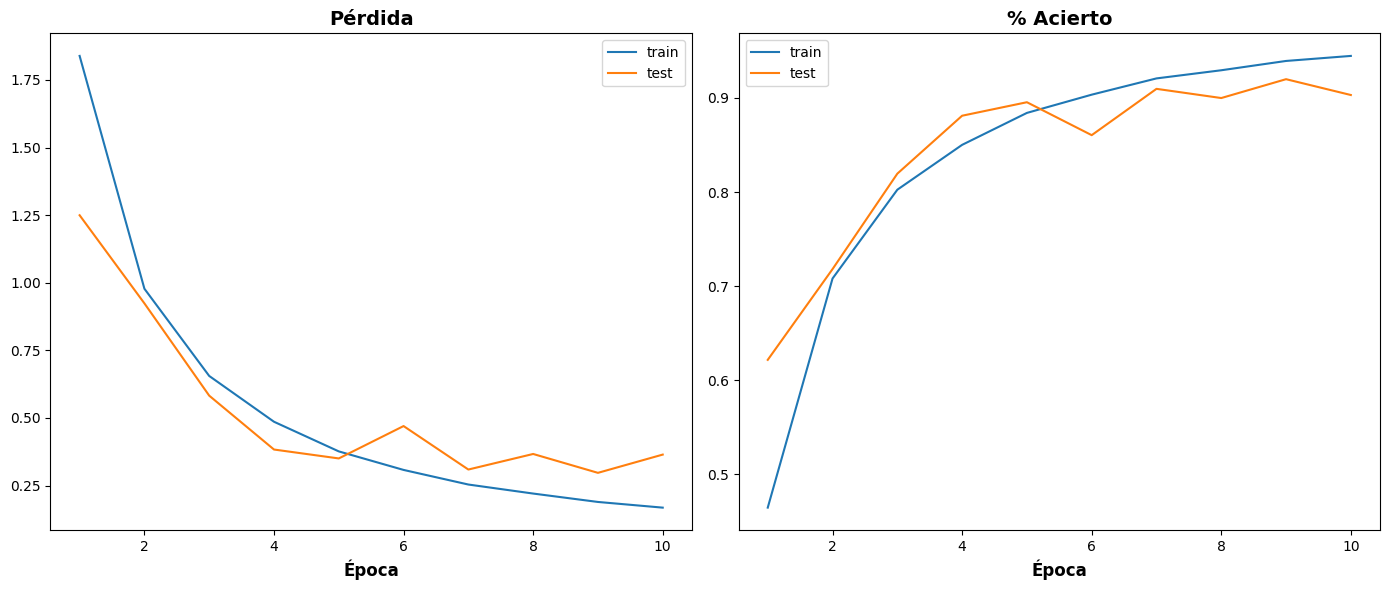

In [ ]:
graficar_historial_entrenamiento(hist_con_aug_4)

In [ ]:
df_metricas_red_sin_augmentation_4 = crear_df_metricas(hist_con_aug_4, "Cuarta_red_con_aug")

,Métrica,Cuarta_red_con_aug
0,accuracy,0.944716
1,loss,0.168340
2,precision,0.957284
3,recall,0.935440
4,val_accuracy,0.903166
5,val_loss,0.364537
6,val_precision,0.920744
7,val_recall,0.893643


*pequeña conclucion

*pequeña conclucion

*pequeña conclucion

##Modelo 5

La quinta arquitectura amplía la estructura anterior agregando un cuarto bloque convolucional con su respectiva capa de batch normalization y pooling, aumentando así la capacidad de extracción de características. Se mantiene la inclusión del batch normalization y capas densas con dropout para favorecer la regularización. Los hiperparámetros se conservaron igual que en el modelo previo. Esta vez, el objetivo principal es reducir el pequeño sobreajuste observado en el modelo anterior, buscando un mejor balance entre ajuste y generalización, al tiempo que se mejora la precisión y se controla la pérdida durante el entrenamiento.

In [ ]:
red_con_augmentation_5 = keras.Sequential(name="Quinta_red_con_aug")
red_con_augmentation_5.add(Input(shape=(64, 64, 3), name="entrada"))

red_con_augmentation_5.add(Conv2D(32, (3, 3), activation='relu', padding='same', name="convolucion_1"))
red_con_augmentation_5.add(BatchNormalization(name="batchNormalization_1"))
red_con_augmentation_5.add(MaxPooling2D((2, 2), name="pooling_1"))

red_con_augmentation_5.add(Conv2D(64, (3, 3), activation='relu', padding='same', name="convolucion_2"))
red_con_augmentation_5.add(BatchNormalization(name="batchNormalization_2"))
red_con_augmentation_5.add(MaxPooling2D((2, 2), name="pooling_2"))

red_con_augmentation_5.add(Conv2D(128, (3, 3), activation='relu', padding='same', name="convolucion_3"))
red_con_augmentation_5.add(BatchNormalization(name="batchNormalization_3"))
red_con_augmentation_5.add(MaxPooling2D((2, 2), name="pooling_3"))

red_con_augmentation_5.add(Conv2D(128, (3, 3), activation='relu', padding='same', name="convolucion_4"))
red_con_augmentation_5.add(BatchNormalization(name="batchNormalization_4"))
red_con_augmentation_5.add(MaxPooling2D((2, 2), name="pooling_4"))

red_con_augmentation_5.add(Flatten(name="Flatten"))

red_con_augmentation_5.add(Dropout(0.4, name="dropout_1"))
red_con_augmentation_5.add(Dense(256, activation='relu', name="CapaOculta_1"))
red_con_augmentation_5.add(BatchNormalization(name="batchNormalization_5"))

red_con_augmentation_5.add(Dropout(0.4, name="dropout_2"))
red_con_augmentation_5.add(Dense(128, activation='relu', name="CapaOculta_2"))
red_con_augmentation_5.add(BatchNormalization(name="batchNormalization_6"))

red_con_augmentation_5.add(Dropout(0.3, name="dropout_3"))
red_con_augmentation_5.add(Dense(18, activation='softmax', name="salida"))

red_con_augmentation_5.summary()

Model: "Quinta_red_con_aug"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ convolucion_1 (Conv2D)               │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batchNormalization_1                 │ (None, 64, 64, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling_1 (MaxPooling2D)             │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ convolucion_2 (Conv2D)               │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batchNormalization_2                 │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling_2 (MaxPooling2D)             │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ convolucion_3 (Conv2D)               │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batchNormalization_3                 │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling_3 (MaxPooling2D)             │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ convolucion_4 (Conv2D)               │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batchNormalization_4                 │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ pooling_4 (MaxPooling2D)             │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ CapaOculta_1 (Dense)                 │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batchNormalization_5                 │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ CapaOculta_2 (Dense)                 │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batchNormalization_6                 │ (None, 128)                 │             5

 Total params: 803,538 (3.07 MB)

 Trainable params: 802,066 (3.06 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [ ]:
np.random.seed(29)
tf.random.set_seed(29)

red_con_augmentation_5.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'precision', 'recall']
)

hist_con_aug_5 = red_con_augmentation_5.fit(
    X_train, y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_val,y_val)
)

Epoch 1/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.3301 - loss: 2.3607 - precision: 0.5573 - recall: 0.1802 - val_accuracy: 0.5377 - val_loss: 1.6001 - val_precision: 0.7139 - val_recall: 0.4324
Epoch 2/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - accuracy: 0.6942 - loss: 1.0161 - precision: 0.8414 - recall: 0.5836 - val_accuracy: 0.7611 - val_loss: 0.7722 - val_precision: 0.8392 - val_recall: 0.7097
Epoch 3/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8080 - loss: 0.6474 - precision: 0.8895 - recall: 0.7469 - val_accuracy: 0.8619 - val_loss: 0.4389 - val_precision: 0.9122 - val_recall: 0.8261
Epoch 4/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8629 - loss: 0.4636 - precision: 0.9144 - recall: 0.8238 - val_accuracy: 0.8102 - val_loss: 0.6437 - val_precision: 0.8567 - val_recall: 0.7760
Epoch 5/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8913 - loss: 0.3619 - precision: 0.9307 - recall: 0.8633 - val_accuracy: 0.861

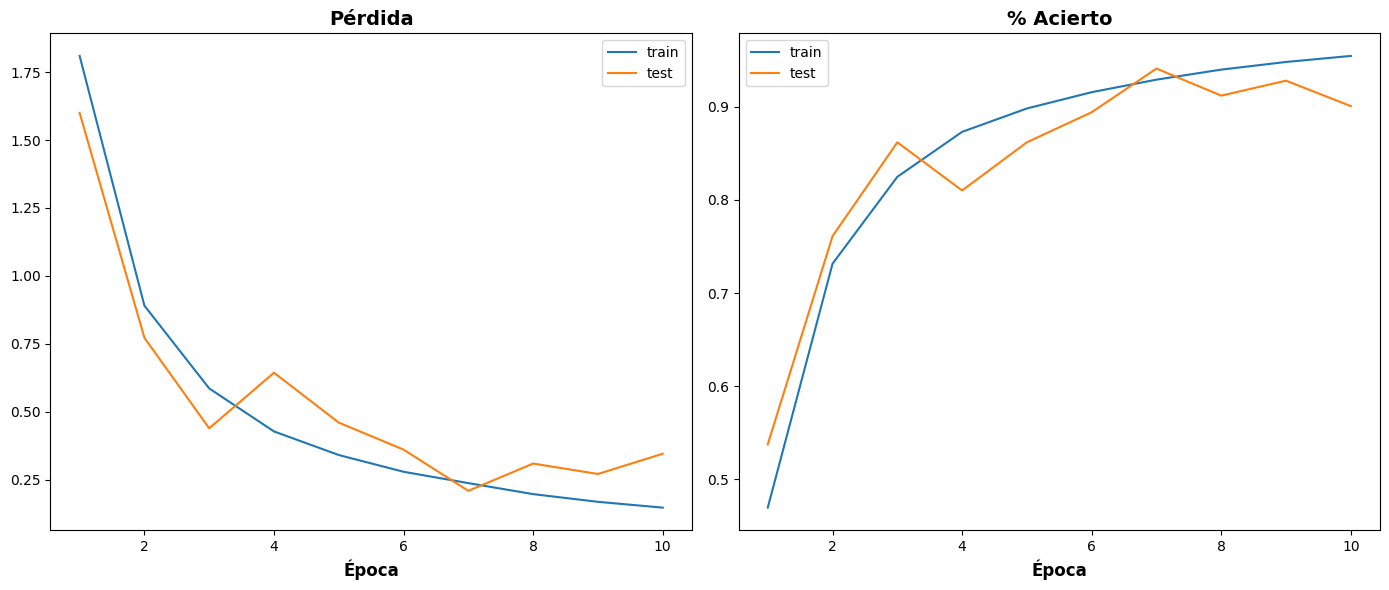

In [ ]:
graficar_historial_entrenamiento(hist_con_aug_5)

In [ ]:
df_metricas_red_sin_augmentation_5 = crear_df_metricas(hist_con_aug_5, "Quinta_red_con_aug")

,Métrica,Quinta_red_con_aug
0,accuracy,0.954579
1,loss,0.146961
2,precision,0.965027
3,recall,0.946169
4,val_accuracy,0.900693
5,val_loss,0.345360
6,val_precision,0.923821
7,val_recall,0.886347


#Comparacion de modelos con data aug

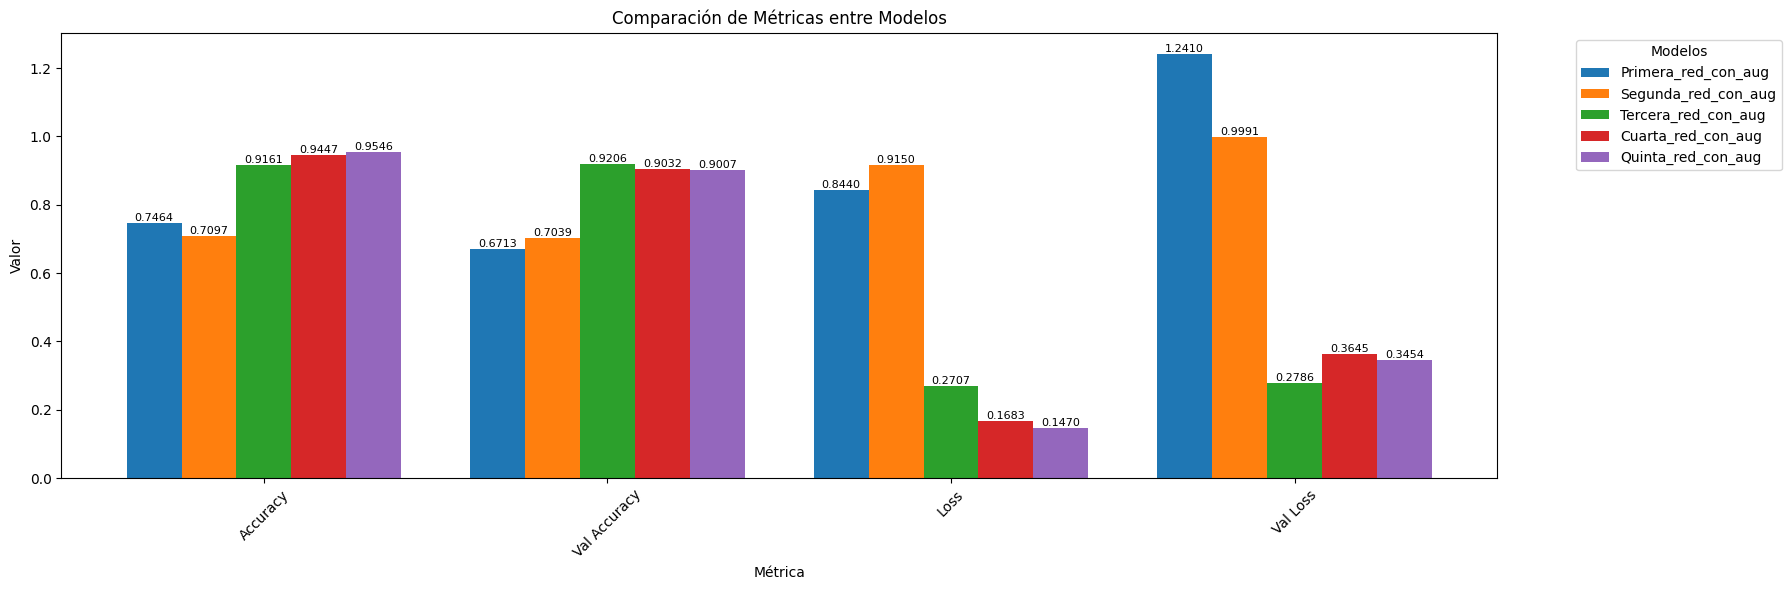

In [ ]:
historiales_2 = [
    hist_con_aug.history,
    hist_con_aug_2.history,
    hist_con_aug_3.history,
    hist_con_aug_4.history,
    hist_con_aug_5.history
]

nombres_modelos_2 = [
    'Primera_red_con_aug',
    'Segunda_red_con_aug',
    'Tercera_red_con_aug',
    'Cuarta_red_con_aug',
    'Quinta_red_con_aug'
]

df_resultado_2 = graficar_comparacion_modelos(historiales_2, nombres_modelos_2)

In [ ]:
modelos_data_con_aug = [
    {
        'Nombre': 'Primera red con aug','Capas Convolucionales': '1 (32, 3×3)','Capas MaxPooling': '1 (2×2)','Batch Normalization': 'No','Capas Ocultas': '5 (512, 256, 128, 64, 32)','Dropout': '5 (4×0.3, 1×0.35)',
        **metricas(hist_con_aug)
    },
    {
        'Nombre': 'Segunda red con aug','Capas Convolucionales': '2 (32, 64, 3×3)','Capas MaxPooling': '2 (2×2)','Batch Normalization': 'No','Capas Ocultas': '5 (512, 256, 128, 64, 32)','Dropout': '5 (4×0.3, 1×0.35)',
        **metricas(hist_con_aug_2)
    },
    {
        'Nombre': 'Tercera red con aug','Capas Convolucionales': '3 (32, 64, 128, 3×3)','Capas MaxPooling': '3 (2×2)','Batch Normalization': 'No','Capas Ocultas': '2 (256, 128)','Dropout': '3 (2×0.4, 1×0.3)',
        **metricas(hist_con_aug_3)
    },
    {
        'Nombre': 'Cuarta red con aug','Capas Convolucionales': '3 (32, 64, 128, 3×3)','Capas MaxPooling': '3 (2×2)','Batch Normalization': '5 capas','Capas Ocultas': '2 (256, 128)','Dropout': '3 (2×0.4, 1×0.3)',
        **metricas(hist_con_aug_4)
    },
    {
        'Nombre': 'Quinta red con aug','Capas Convolucionales': '4 (32, 64, 128, 128, 3×3)','Capas MaxPooling': '4 (2×2)','Batch Normalization': '6 capas','Capas Ocultas': '2 (256, 128)','Dropout': '3 (2×0.4, 1×0.3)',
        **metricas(hist_con_aug_5)
    }
]

modelos_con_aug = pd.DataFrame(modelos_data_con_aug)

modelos_con_aug

,Nombre,Capas Convolucionales,Capas MaxPooling,Batch Normalization,Capas Ocultas,Dropout,Train Accuracy,Validation Accuracy,Train Loss,Validation Loss
0,Primera red con aug,"1 (32, 3×3)",1 (2×2),No,"5 (512, 256, 128, 64, 32)","5 (4×0.3, 1×0.35)",0.7464,0.6713,0.8440,1.2410
1,Segunda red con aug,"2 (32, 64, 3×3)",2 (2×2),No,"5 (512, 256, 128, 64, 32)","5 (4×0.3, 1×0.35)",0.7097,0.7039,0.9150,0.9991
2,Tercera red con aug,"3 (32, 64, 128, 3×3)",3 (2×2),No,"2 (256, 128)","3 (2×0.4, 1×0.3)",0.9161,0.9206,0.2707,0.2786
3,Cuarta red con aug,"3 (32, 64, 128, 3×3)",3 (2×2),5 capas,"2 (256, 128)","3 (2×0.4, 1×0.3)",0.9447,0.9032,0.1683,0.3645
4,Quinta red con aug,"4 (32, 64, 128, 128, 3×3)",4 (2×2),6 capas,"2 (256, 128)","3 (2×0.4, 1×0.3)",0.9546,0.9007,0.1470,0.3454


In [ ]:
modelos_2 = [red_con_augmentation, red_con_augmentation_2, red_con_augmentation_3, red_con_augmentation_4, red_con_augmentation_5]

val_accuracies_2 = [h['val_accuracy'][-1] for h in historiales_2]

indice_mejor_2 = val_accuracies_2.index(max(val_accuracies_2))

mejor_modelo_2 = modelos_2[indice_mejor_2]
nombre_mejor_modelo_2 = mejor_modelo_2.name
hist_mejor_2 = historiales_2[indice_mejor_2]

print(f"Mejor modelo según mayor Val Accuracy:")
print(f"Modelo: {nombre_mejor_modelo_2}")

mejor_modelo_2.save("modelo_mejor_2.keras")

############

In [ ]:
modelos_2 = [red_con_augmentation, red_con_augmentation_2, red_con_augmentation_3, red_con_augmentation_4, red_con_augmentation_5]

val_accuracies_2 = [h['val_accuracy'][-1] for h in historiales_2]

indice_mejor_2 = val_accuracies_2.index(max(val_accuracies_2))

mejor_modelo_2 = modelos_2[indice_mejor_2]
nombre_mejor_modelo_2 = mejor_modelo_2.name
hist_mejor_2 = historiales_2[indice_mejor_2]

acc = hist_mejor_2['accuracy'][-1]
val_acc = hist_mejor_2['val_accuracy'][-1]
loss = hist_mejor_2['loss'][-1]
val_loss = hist_mejor_2['val_loss'][-1]
recall = hist_mejor_2['recall'][-1]
val_recall = hist_mejor_2['val_recall'][-1]
precision = hist_mejor_2['precision'][-1]
val_precision = hist_mejor_2['val_precision'][-1]
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
val_f1_score = 2 * (val_precision * val_recall) / (val_precision + val_recall) if (val_precision + val_recall) > 0 else 0


print(f"Mejor modelo según mayor Val Accuracy:")
print(f"Modelo:         {nombre_mejor_modelo_2}")
print(f"Accuracy:       {acc:.4f}")
print(f"Val Accuracy:   {val_acc:.4f}")
print(f"Loss:           {loss:.4f}")
print(f"Val Loss:       {val_loss:.4f}")
print(f"Recall:         {recall:.4f}")
print(f"val_Recall:     {val_recall:.4f}")
print(f"Precision:      {precision:.4f}")
print(f"val_Precision:  {val_precision:.4f}")
print(f"F1 Score:       {f1_score:.4f}")
print(f"val_F1 Score:   {val_f1_score:.4f}")

mejor_modelo_2.save("modelo_mejor_2.keras")

Mejor modelo según mayor Val Accuracy:
Modelo:         Tercera_red_con_aug
Accuracy:       0.9161
Val Accuracy:   0.9206
Loss:           0.2707
Val Loss:       0.2786
Recall:         0.8941
val_Recall:     0.8955
Precision:      0.9434
val_Precision:  0.9523
F1 Score:       0.9181
val_F1 Score:   0.9230


¨CONCLUCIONES MEJOR MODELO 2

¨CONCLUCIONES MEJOR MODELO 2

¨CONCLUCIONES MEJOR MODELO 2

#Mejor modelo : SIN VS CON DATA AUG

In [ ]:
import pandas as pd
import numpy as np

# Convert the lists to pandas Series with appropriate index names
val_accuracies_series = pd.Series(val_accuracies, index=nombres_modelos) # Assuming nombres_modelos is available from previous cells
val_accuracies_2_series = pd.Series(val_accuracies_2, index=nombres_modelos_2)

# Concatenate the two Series
los_val_acc_combinados = pd.concat([val_accuracies_series, val_accuracies_2_series])

# Find the best model and its accuracy
mejor_modelo_general = los_val_acc_combinados.idxmax()
mejor_val_accuracy_general = los_val_acc_combinados.max()

# Assuming 'mejor_modelo' and 'mejor_modelo_2' are defined from previous cells
print(f"El mejor modelo sin data augmentation es: {mejor_modelo.name}")
print(f"El mejor modelo con data augmentation es: {mejor_modelo_2.name}")

print(f"El mejor modelo en general según 'val_accuracy' es: {mejor_modelo_general} con un valor de {mejor_val_accuracy_general:.4f}")

El mejor modelo sin data augmentation es: Quinta_red_sin_aug
El mejor modelo con data augmentation es: Tercera_red_con_aug
El mejor modelo en general según 'val_accuracy' es: Tercera_red_con_aug con un valor de 0.9206


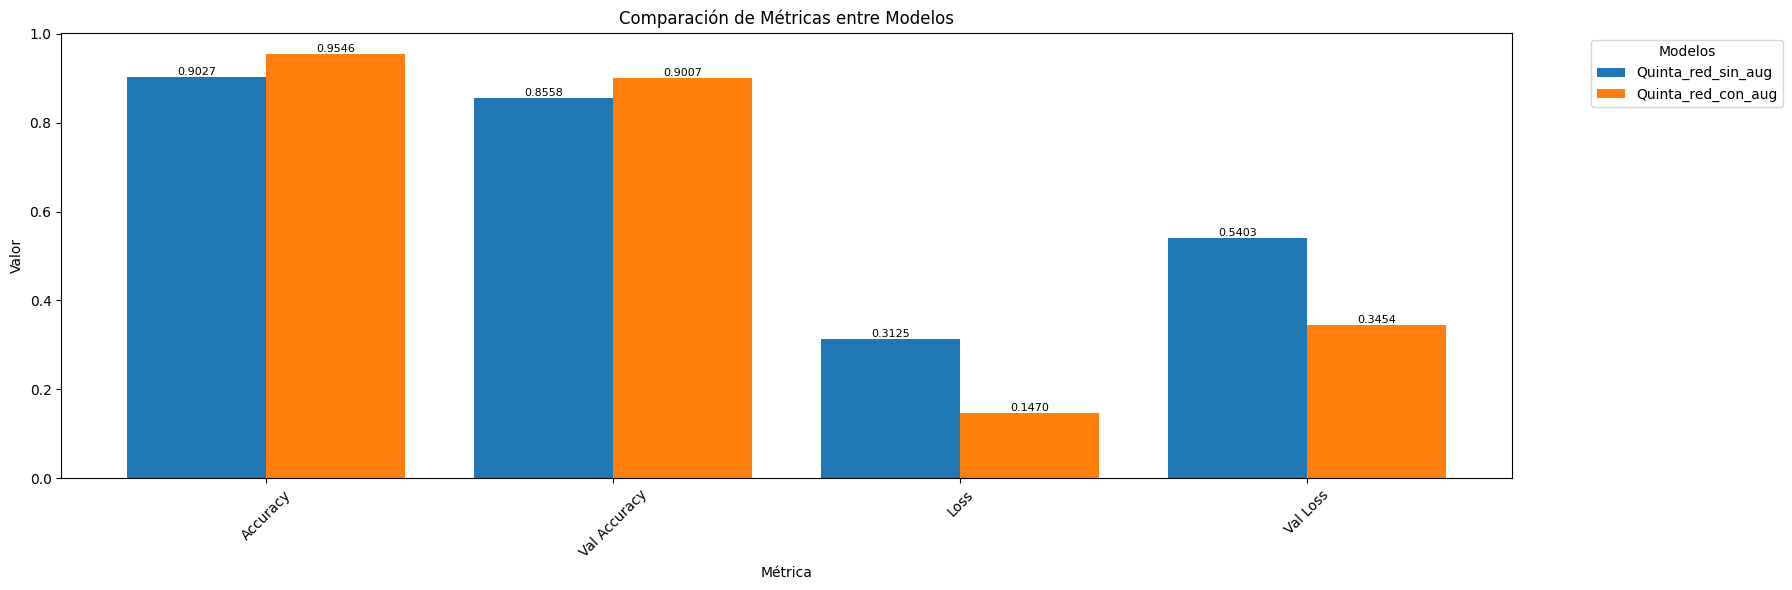

In [ ]:
historiales_3 = [
    hist_sin_aug_5.history,
    hist_con_aug_3.history
]

nombres_modelos_3 = [
    'Quinta_red_sin_aug',
    'Tercera_red_con_aug'
]

df_resultado_3 = graficar_comparacion_modelos(historiales_3, nombres_modelos_3)

#Predicciones

In [ ]:
from tensorflow.keras.models import load_model

cargarmodel = load_model('modelo_mejor_2.keras')

prediccion = cargarmodel.evaluate(X_test, y_test)

28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9789 - loss: 0.1142 - precision: 0.9884 - recall: 0.9582


In [ ]:
num_images = 36
cols = 6
rows = (num_images + cols - 1) // cols

plt.figure(figsize=(cols * 2, rows * 2))

for i in range(num_images):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(cv2.cvtColor((X_test[i] * 255).astype("uint8"), cv2.COLOR_BGR2RGB))
    plt.axis('off')

    true_class_index = np.argmax(y_test[i])
    pred_class_index = np.argmax(cargarmodel.predict(X_test[i:i + 1])[0])

    true_label = MAP_CHARACTERS[true_class_index]
    pred_label = MAP_CHARACTERS[pred_class_index]
    color = "green" if true_class_index == pred_class_index else "red"

    # Etiquetas en líneas separadas
    plt.title(f"Real: {true_label}\nPred: {pred_label}", color=color, fontsize=8)

plt.tight_layout()
plt.show()


#Concluciones

1. Problemas con la ram:

2. Errores en la predicciones:

3. Mejor modelo:

4. Propuestas de arquitecturas o algo relacionado a las arquitecturas:

5. importancia del data aug, aunque sin ella igual se logro resultados optimos, no mejores pero si un poco aceptable

6. Desechar varaibles o set de datos que no se volveran a ocupar para rescatar ram